# Segmentación de Contribuyentes Vehiculares mediante Clustering No Supervisado

## Trabajo Académico - Análisis de Datos

**Integrantes:**
- Anderson Ticona
- Matias Sulca
- Christian Rosales
- Johan Amador

---

## Resumen Ejecutivo

Este proyecto implementa un modelo de clustering no supervisado utilizando K-Prototypes para segmentar contribuyentes vehiculares en el sistema fiscal peruano. El análisis se realiza sobre un dataset de **247,816 registros con 9 variables** (3 numéricas escaladas y 6 categóricas agrupadas), identificando **4 segmentos distintos** de contribuyentes mediante el método del codo.

**Resultados principales:**
- **4 clusters identificados** con métricas de validación superiores al 96%
- **Accuracy del 96.17%** en la predicción de clusters
- **Validación cruzada de 96.00% ± 0.19%**, confirmando modelo estable y robusto
- **Segmentación clara** entre vehículos económicos, medio-altos, premium y casos anómalos
- **Identificación de casos especiales** (0.43% del total) que requieren investigación fiscal prioritaria
- **Análisis de estabilidad con bootstrapping**: ARI promedio de 0.661, indicando estabilidad moderada a buena
- **Concentración en dos segmentos principales**: Los clusters 0 y 3 concentran el 91.66% de los contribuyentes, representando los segmentos dominantes del mercado vehicular peruano

## 1. Introducción

### 1.1 Contexto del Problema

La administración tributaria requiere herramientas para segmentar y entender el comportamiento de los contribuyentes vehiculares. La segmentación permite:
- Optimizar estrategias de fiscalización
- Identificar patrones de comportamiento
- Mejorar la asignación de recursos
- Desarrollar políticas tributarias más efectivas

### 1.2 Objetivos

**Objetivo General:**
Desarrollar un modelo de clustering no supervisado para segmentar contribuyentes vehiculares en el sistema fiscal peruano.

**Objetivos Específicos:**
1. Preprocesar y transformar datos mixtos (numéricos y categóricos)
2. Identificar el número óptimo de clusters mediante validación
3. Entrenar y validar un modelo K-Prototypes
4. Interpretar y caracterizar cada segmento identificado
5. Validar la estabilidad y generalización del modelo

## 2. Marco Teórico

### 2.1 Clustering No Supervisado

El clustering es una técnica de aprendizaje no supervisado que agrupa datos similares sin necesidad de etiquetas previas. En este proyecto utilizamos **K-Prototypes**, una extensión de K-Means que maneja datos mixtos (numéricos y categóricos).

### 2.2 K-Prototypes

K-Prototypes combina:
- **Distancia euclidiana** para variables numéricas
- **Distancia de Hamming** para variables categóricas

**Ventajas:**
- Maneja datos mixtos nativamente
- Eficiente computacionalmente
- Interpretable

### 2.3 Validación de Clustering

Para validar el modelo utilizamos:
- **Train/Test Split**: División 75/25 para validación externa
- **Modelo Supervisado (KNN)**: Para predecir clusters y medir concordancia
- **Métricas**: Adjusted Rand Index, Jaccard Index, Accuracy
- **Validación Cruzada**: Para medir estabilidad

## 3. Metodología

### 3.1 Descripción del Dataset

- **Tamaño**: 251,817 registros
- **Variables**: 106 características
  - 10 variables numéricas (valores fiscales, años)
  - 96 variables categóricas booleanas (tipo de vehículo, distrito, contribuyente)

### 3.2 Pipeline de Análisis

1. **Preprocesamiento**: Limpieza y exploración de datos
2. **Transformación**: Escalado de numéricas, encoding de categóricas
3. **División**: Train (75%) / Test (25%)
4. **Optimización**: Grid Search para K óptimo
5. **Entrenamiento**: Modelo K-Prototypes
6. **Validación**: Métricas y modelo supervisado
7. **Interpretación**: Análisis de centroides y perfiles

## 4. Implementación

### 4.1 Carga y Exploración Inicial de Datos

In [4]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
ruta_csv = r"C:\Users\FIGMM-UNI\OneDrive\Escritorio\Analisis\Clust\datos_post_step4a_scaled_no_dummies (1).csv"
df = pd.read_csv(ruta_csv)

# Mostrar información básica del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"\nNúmero de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")

Dimensiones del dataset: (247816, 9)

Número de filas: 247,816
Número de columnas: 9


In [5]:
# Ver las primeras filas
df.head()

,tipo_persona,tipo_contribuyente,categoria_vehiculo,marca_agrupada,distrito_fiscal_agrupado,porcentaje_propiedad_cat,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled
0,natural,pequeno,b1234_pickup_otros,FORD,OTROS,propietario_total,0.791119,0.817195,0.5
1,natural,pequeno,b1234_pickup_otros,CHEVROLET,OTROS,propietario_total,-0.618776,-0.541252,-0.5
2,natural,pequeno,b1234_pickup_otros,OTROS,OTROS,propietario_total,0.867780,0.928145,0.0
3,soc_conyugal,pequeno,a2_1051_1500cc,HYUNDAI,OTROS,propietario_total,-0.481942,-0.800322,0.5
4,natural,pequeno,b1234_pickup_otros,JETOUR,OTROS,propietario_total,-0.478479,-0.154281,0.0


In [6]:
# Ver información sobre las columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247816 entries, 0 to 247815
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tipo_persona                    247816 non-null  object 
 1   tipo_contribuyente              247816 non-null  object 
 2   categoria_vehiculo              247816 non-null  object 
 3   marca_agrupada                  247816 non-null  object 
 4   distrito_fiscal_agrupado        247816 non-null  object 
 5   porcentaje_propiedad_cat        247816 non-null  object 
 6   valor_adquisicion_scaled        247816 non-null  float64
 7   valor_referencial_scaled        247816 non-null  float64
 8   anios_desde_inscripcion_scaled  247816 non-null  float64
dtypes: float64(3), object(6)
memory usage: 17.0+ MB


In [7]:
# ============================================
# ANÁLISIS DE VARIABLES CATEGÓRICAS
# ============================================

print("="*80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

# Identificar variables categóricas
df_categoricas = df.select_dtypes(include=['object'])

print(f"\nTotal de variables categóricas: {df_categoricas.shape[1]}")
print(f"Variables: {list(df_categoricas.columns)}")

# Analizar cada variable categórica
print("\n" + "="*80)
print("DETALLE POR VARIABLE CATEGÓRICA")
print("="*80)

analisis_cat = []

for col in df_categoricas.columns:
    n_unique = df_categoricas[col].nunique()
    n_total = len(df_categoricas[col])
    pct_unique = (n_unique / n_total * 100)
    
    # Ver valores únicos
    valores_unicos = df_categoricas[col].unique()
    
    analisis_cat.append({
        'Variable': col,
        'N_Clases': n_unique,
        'N_Total': n_total,
        '%_Clases': pct_unique,
        'Valores_Unicos': valores_unicos
    })
    
    print(f"\n{'─'*80}")
    print(f"📊 Variable: {col}")
    print(f"{'─'*80}")
    print(f"  • Número de clases únicas: {n_unique}")
    print(f"  • Total de registros: {n_total:,}")
    print(f"  • % de clases respecto al total: {pct_unique:.2f}%")
    
    # Mostrar distribución
    print(f"\n  Distribución de valores:")
    distribucion = df_categoricas[col].value_counts()
    print(distribucion.head(10))
    
    if n_unique > 10:
        print(f"\n  ⚠️  ADVERTENCIA: Esta variable tiene {n_unique} clases")
        print(f"     Considerar agrupación o reducción de categorías")
    else:
        print(f"\n  ✅ OK: Número de clases razonable para K-Prototypes")

# Resumen
print("\n" + "="*80)
print("RESUMEN")
print("="*80)

df_analisis = pd.DataFrame(analisis_cat)
print("\nTabla resumen:")
print(df_analisis[['Variable', 'N_Clases', '%_Clases']].to_string(index=False))

# Identificar variables problemáticas
print("\n⚠️  VARIABLES CON ALTA CARDINALIDAD (>20 clases):")
problemas = df_analisis[df_analisis['N_Clases'] > 20]
if len(problemas) > 0:
    print(problemas[['Variable', 'N_Clases']].to_string(index=False))
    print("\n💡 RECOMENDACIÓN: Considerar agrupación de categorías para estas variables")
else:
    print("✅ No se encontraron variables con cardinalidad excesiva")

# Identificar variables con baja cardinalidad (buenas para K-Prototypes)
print("\n✅ VARIABLES CON CARDINALIDAD RAZONABLE (≤20 clases):")
buenas = df_analisis[df_analisis['N_Clases'] <= 20]
print(buenas[['Variable', 'N_Clases']].to_string(index=False))

ANÁLISIS DE VARIABLES CATEGÓRICAS

Total de variables categóricas: 6
Variables: ['tipo_persona', 'tipo_contribuyente', 'categoria_vehiculo', 'marca_agrupada', 'distrito_fiscal_agrupado', 'porcentaje_propiedad_cat']

DETALLE POR VARIABLE CATEGÓRICA

────────────────────────────────────────────────────────────────────────────────
📊 Variable: tipo_persona
────────────────────────────────────────────────────────────────────────────────
  • Número de clases únicas: 4
  • Total de registros: 247,816
  • % de clases respecto al total: 0.00%

  Distribución de valores:
tipo_persona
natural         105048
juridica         89476
soc_conyugal     53247
otros               45
Name: count, dtype: int64

  ✅ OK: Número de clases razonable para K-Prototypes

────────────────────────────────────────────────────────────────────────────────
📊 Variable: tipo_contribuyente
────────────────────────────────────────────────────────────────────────────────
  • Número de clases únicas: 3
  • Total de registros

In [8]:
# Ver estadísticas descriptivas
df.describe()

,valor_adquisicion_scaled,valor_referencial_scaled,anios_desde_inscripcion_scaled
count,247816.000000,247816.000000,247816.000000
mean,0.081456,0.157913,-0.004370
std,1.247004,0.825452,0.400584
min,-15.267415,-4.533988,-0.500000
25%,-0.441097,-0.435798,-0.500000
50%,0.000000,0.000000,0.000000
75%,0.558903,0.564202,0.500000
max,6.175663,4.301016,0.500000


In [9]:
# Ver nombres de todas las columnas
print("Columnas del dataset:")
print(df.columns.tolist())

Columnas del dataset:
['tipo_persona', 'tipo_contribuyente', 'categoria_vehiculo', 'marca_agrupada', 'distrito_fiscal_agrupado', 'porcentaje_propiedad_cat', 'valor_adquisicion_scaled', 'valor_referencial_scaled', 'anios_desde_inscripcion_scaled']


### 4.2 Preprocesamiento de Datos

En esta sección realizamos:
- Verificación de valores nulos
- Identificación de tipos de variables
- Análisis exploratorio básico

In [10]:
# ============================================
# PASO 1: PREPROCESAMIENTO INICIAL
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Verificar datos cargados
print(f"Dimensiones: {df.shape}")
print(f"\nTipos de datos:")
print(df.dtypes.value_counts())

Dimensiones: (247816, 9)

Tipos de datos:
object     6
float64    3
Name: count, dtype: int64


In [11]:
# Verificar valores nulos
nas = pd.DataFrame(df.isnull().sum()).sort_values(0, ascending=False)
nas.columns = ['nas']
nas['nas%'] = round(nas['nas']/df.shape[0] * 100, 2)
print("Valores nulos:")
print(nas[nas['nas'] > 0])

Valores nulos:
Empty DataFrame
Columns: [nas, nas%]
Index: []


### 4.3 Separación de Variables

Separamos las variables en:
- **Numéricas**: Valores fiscales, años desde inscripción
- **Categóricas**: Tipo de vehículo, distrito, tipo de contribuyente

In [13]:
# ============================================
# PASO 2: SEPARACIÓN DE VARIABLES (CORREGIDO)
# ============================================

# Identificar variables numéricas (ya escaladas)
df_numericas = df.select_dtypes(include=['float64', 'int64'])
print(f"Variables numéricas (ya escaladas): {df_numericas.shape[1]}")
print(f"Columnas: {list(df_numericas.columns)}")

# Identificar variables categóricas (CORREGIDO: object en lugar de bool)
df_categoricas = df.select_dtypes(include=['object'])  # ← CORREGIDO
print(f"\nVariables categóricas (agrupadas): {df_categoricas.shape[1]}")
print(f"Columnas: {list(df_categoricas.columns)}")

Variables numéricas (ya escaladas): 3
Columnas: ['valor_adquisicion_scaled', 'valor_referencial_scaled', 'anios_desde_inscripcion_scaled']

Variables categóricas (agrupadas): 6
Columnas: ['tipo_persona', 'tipo_contribuyente', 'categoria_vehiculo', 'marca_agrupada', 'distrito_fiscal_agrupado', 'porcentaje_propiedad_cat']


### 4.4 División Train/Test

Dividimos los datos en:
- **Train (75%)**: 188,862 registros para entrenamiento
- **Test (25%)**: 62,955 registros para validación

**Importante**: Esta división se realiza ANTES de cualquier transformación para evitar data leakage.

In [14]:
# ============================================
# PASO 3: PARTICIÓN TRAIN/TEST (CORREGIDO)
# ============================================

from sklearn.model_selection import train_test_split

# Dividir en train (75%) y test (25%)
x_train, x_test = train_test_split(df, test_size=0.25, random_state=2025, shuffle=True)

print(f"Train: {x_train.shape}")
print(f"Test: {x_test.shape}")

# Separar por tipo en train y test (CORREGIDO: object en lugar de bool)
x_train_numericas = x_train.select_dtypes(include=['float64', 'int64'])
x_train_categoricas = x_train.select_dtypes(include=['object'])  # ← CORREGIDO

x_test_numericas = x_test.select_dtypes(include=['float64', 'int64'])
x_test_categoricas = x_test.select_dtypes(include=['object'])  # ← CORREGIDO

print(f"\nTrain - Numéricas: {x_train_numericas.shape}, Categóricas: {x_train_categoricas.shape}")
print(f"Test - Numéricas: {x_test_numericas.shape}, Categóricas: {x_test_categoricas.shape}")

# Verificar
print(f"\n✅ Variables numéricas: {list(x_train_numericas.columns)}")
print(f"✅ Variables categóricas: {list(x_train_categoricas.columns)}")

Train: (185862, 9)
Test: (61954, 9)

Train - Numéricas: (185862, 3), Categóricas: (185862, 6)
Test - Numéricas: (61954, 3), Categóricas: (61954, 6)

✅ Variables numéricas: ['valor_adquisicion_scaled', 'valor_referencial_scaled', 'anios_desde_inscripcion_scaled']
✅ Variables categóricas: ['tipo_persona', 'tipo_contribuyente', 'categoria_vehiculo', 'marca_agrupada', 'distrito_fiscal_agrupado', 'porcentaje_propiedad_cat']


### 4.5 Transformaciones

#### 4.5.1 Escalado de Variables Numéricas

Utilizamos **StandardScaler** para normalizar las variables numéricas:
- **Fit**: Solo con datos de entrenamiento
- **Transform**: Aplicado a train y test por separado
- **Guardado**: Para uso futuro con nuevos datos

In [15]:
# ============================================
# PASO 4: OMITIDO - LAS NUMÉRICAS YA ESTÁN ESCALADAS
# ============================================

print("⚠️  PASO 4 OMITIDO: Las variables numéricas ya están escaladas")
print("   Columnas numéricas ya escaladas:")
print(f"   {list(x_train_numericas.columns)}")
print("\n✅ Usaremos directamente x_train_numericas y x_test_numericas")

⚠️  PASO 4 OMITIDO: Las variables numéricas ya están escaladas
   Columnas numéricas ya escaladas:
   ['valor_adquisicion_scaled', 'valor_referencial_scaled', 'anios_desde_inscripcion_scaled']

✅ Usaremos directamente x_train_numericas y x_test_numericas


#### 4.5.2 Encoding de Variables Categóricas

Utilizamos **OneHotEncoder** para las variables categóricas:
- **Drop first**: Para evitar multicolinealidad
- **Handle unknown**: Para manejar categorías nuevas en test

In [16]:
# ============================================
# PASO 5: OMITIDO POR AHORA - OHE solo para KNN al final
# ============================================

print("⚠️  PASO 5 OMITIDO: OHE solo se necesita para KNN (validación)")
print("   K-Prototypes usa categóricas directamente (object)")
print("   Haremos OHE más adelante solo para el modelo KNN")

⚠️  PASO 5 OMITIDO: OHE solo se necesita para KNN (validación)
   K-Prototypes usa categóricas directamente (object)
   Haremos OHE más adelante solo para el modelo KNN


In [23]:
# ============================================
# PASO 6: PREPARACIÓN PARA K-PROTOTYPES (CORREGIDO)
# ============================================

# Usar directamente: Numéricas (ya escaladas) + Categóricas (object)
x_train_v2 = pd.concat([x_train_numericas, x_train_categoricas], axis=1)
x_test_v2 = pd.concat([x_test_numericas, x_test_categoricas], axis=1)

print(f"Train v2 (para K-Prototypes): {x_train_v2.shape}")
print(f"Test v2 (para K-Prototypes): {x_test_v2.shape}")

# VERIFICAR ORDEN DE COLUMNAS
print(f"\nOrden de columnas en x_train_v2:")
for i, col in enumerate(x_train_v2.columns):
    print(f"  Posición {i}: {col} ({x_train_v2[col].dtype})")

# Identificar posición de variables categóricas (object)
catColumnsPos = [x_train_v2.columns.get_loc(col) 
                 for col in list(x_train_v2.select_dtypes(['object']).columns)]

print(f'\n✅ Categorical columns: {list(x_train_v2.select_dtypes(["object"]).columns)}')
print(f'✅ Categorical columns positions: {catColumnsPos}')

# IMPORTANTE: Convertir categóricas a string explícitamente antes de numpy
# K-Prototypes necesita que las categóricas sean strings
for col in x_train_v2.select_dtypes(['object']).columns:
    x_train_v2[col] = x_train_v2[col].astype(str)
    x_test_v2[col] = x_test_v2[col].astype(str)

# Convertir a matriz numpy
Xmatrix_train = x_train_v2.to_numpy()
Xmatrix_test = x_test_v2.to_numpy()

print(f"\nMatriz train: {Xmatrix_train.shape}")
print(f"Matriz test: {Xmatrix_test.shape}")

# VERIFICAR que las posiciones categóricas tienen strings
print(f"\nVerificación - Tipo de datos en posiciones categóricas:")
for pos in catColumnsPos:
    print(f"  Posición {pos}: {type(Xmatrix_train[0, pos])} - Ejemplo: {Xmatrix_train[0, pos]}")

Train v2 (para K-Prototypes): (185862, 9)
Test v2 (para K-Prototypes): (61954, 9)

Orden de columnas en x_train_v2:
  Posición 0: valor_adquisicion_scaled (float64)
  Posición 1: valor_referencial_scaled (float64)
  Posición 2: anios_desde_inscripcion_scaled (float64)
  Posición 3: tipo_persona (object)
  Posición 4: tipo_contribuyente (object)
  Posición 5: categoria_vehiculo (object)
  Posición 6: marca_agrupada (object)
  Posición 7: distrito_fiscal_agrupado (object)
  Posición 8: porcentaje_propiedad_cat (object)

✅ Categorical columns: ['tipo_persona', 'tipo_contribuyente', 'categoria_vehiculo', 'marca_agrupada', 'distrito_fiscal_agrupado', 'porcentaje_propiedad_cat']
✅ Categorical columns positions: [3, 4, 5, 6, 7, 8]

Matriz train: (185862, 9)
Matriz test: (61954, 9)

Verificación - Tipo de datos en posiciones categóricas:
  Posición 3: <class 'str'> - Ejemplo: juridica
  Posición 4: <class 'str'> - Ejemplo: grande
  Posición 5: <class 'str'> - Ejemplo: b1234_pickup_otros
  Posi

In [24]:
# Convertir a matriz numpy para K-Prototypes
Xmatrix_train = x_train_v2.to_numpy()
Xmatrix_test = x_test_v2.to_numpy()

print(f"Matriz train: {Xmatrix_train.shape}")
print(f"Matriz test: {Xmatrix_test.shape}")

Matriz train: (185862, 9)
Matriz test: (61954, 9)


In [25]:
# ============================================
# PASO 7: Uso de K-Prototypes
# ============================================

from kmodes.kprototypes import KPrototypes
print("KPrototypes importado correctamente")

KPrototypes importado correctamente


### 4.6 Optimización de Hiperparámetros

#### Grid Search para K Óptimo

Buscamos el número óptimo de clusters probando:
- **K**: [3, 4, 5, 6, 7, 8]
- **Inicialización**: ['Cao', 'random']
- **Número de inicializaciones**: [5, 10]
- **Iteraciones máximas**: [50, 100]

**Optimización**: Utilizamos una muestra de 10,000 registros para velocidad.

In [26]:
# ============================================
# PASO 8: GRID SEARCH (CORREGIDO)
# ============================================

import itertools
from tqdm import tqdm

# Usar muestra para velocidad
print("Creando muestra para grid search...")
sample_size = min(10000, len(Xmatrix_train))
np.random.seed(2025)
sample_indices = np.random.choice(Xmatrix_train.shape[0], size=sample_size, replace=False)
X_sample = Xmatrix_train[sample_indices, :]

print(f"Muestra para grid search: {X_sample.shape}")
print(f"Posiciones categóricas a usar: {catColumnsPos}")

# VERIFICAR que catColumnsPos no está vacío
if len(catColumnsPos) == 0:
    print("\n❌ ERROR: catColumnsPos está vacío!")
    print("Verifica que las columnas categóricas se identificaron correctamente")
else:
    print(f"✅ {len(catColumnsPos)} columnas categóricas identificadas")

# Parámetros a probar
K_values = [3, 4, 5, 6, 7, 8]
inits = ['Cao', 'random']
n_inits = [5, 10]
max_iters = [50, 100]

def gridsearch_kprototypes(X, catCols, K_values, inits, n_inits, max_iters):
    results = []
    total_combinations = len(K_values) * len(inits) * len(n_inits) * len(max_iters)
    
    print(f"Total de combinaciones a probar: {total_combinations}")
    
    # VERIFICAR que catCols no está vacío
    if len(catCols) == 0:
        print("❌ ERROR: catCols está vacío en la función!")
        return None, pd.DataFrame()
    
    for k, init, n_init, max_iter in tqdm(itertools.product(K_values, inits, n_inits, max_iters),
                                          total=total_combinations):
        try:
            model = KPrototypes(
                n_clusters=k, 
                init=init, 
                n_init=n_init, 
                max_iter=max_iter, 
                random_state=2025,
                n_jobs=-1
            )
            # IMPORTANTE: Pasar catCols como lista explícita
            labels = model.fit_predict(X, categorical=catCols)
            cost = model.cost_
            
            results.append({
                'K': k, 
                'init': init, 
                'n_init': n_init, 
                'max_iter': max_iter, 
                'cost': cost
            })
        except Exception as e:
            print(f"Error con K={k}, init={init}: {e}")
            continue
    
    df_results = pd.DataFrame(results)
    if len(df_results) > 0:
        best = df_results.loc[df_results['cost'].idxmin()]
        print("\n✅ Mejor combinación encontrada:")
        print(best)
    else:
        best = None
        print("\n❌ No se encontraron resultados válidos")
    
    return best, df_results

# Ejecutar grid search
print("\n🚀 Iniciando grid search...")
best, df_results = gridsearch_kprototypes(X_sample, catColumnsPos, K_values, inits, n_inits, max_iters)

Creando muestra para grid search...
Muestra para grid search: (10000, 9)
Posiciones categóricas a usar: [3, 4, 5, 6, 7, 8]
✅ 6 columnas categóricas identificadas

🚀 Iniciando grid search...
Total de combinaciones a probar: 48


100%|██████████| 48/48 [05:20<00:00,  6.68s/it]


✅ Mejor combinación encontrada:
K                      8
init              random
n_init                10
max_iter              50
cost        13146.872564
Name: 46, dtype: object


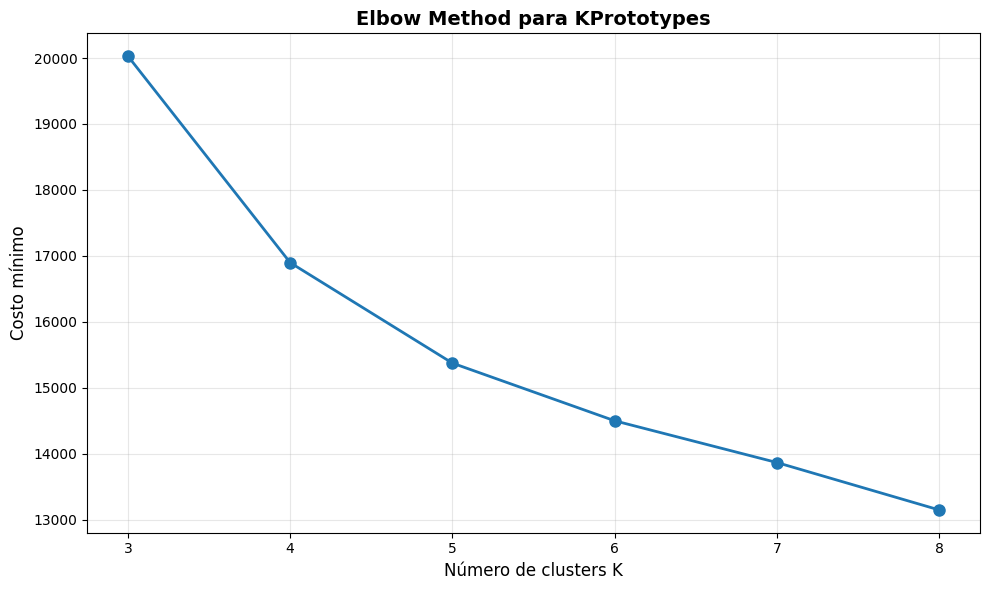


Resultados agrupados por K:
   K          cost
0  3  20030.022785
1  4  16897.561482
2  5  15373.628986
3  6  14499.294387
4  7  13865.935806
5  8  13146.872564


In [27]:
# ============================================
# PASO 9: Visualización de resultados
# ============================================
# Visualizar resultados del grid search
if len(df_results) > 0:
    # Agrupar por K y tomar el costo mínimo
    elbow_data = df_results.groupby('K')['cost'].min().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(elbow_data['K'], elbow_data['cost'], marker='o', linewidth=2, markersize=8)
    plt.title("Elbow Method para KPrototypes", fontsize=14, fontweight='bold')
    plt.xlabel("Número de clusters K", fontsize=12)
    plt.ylabel("Costo mínimo", fontsize=12)
    plt.xticks(elbow_data['K'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla de resultados
    print("\nResultados agrupados por K:")
    print(elbow_data)
else:
    print("No hay resultados para visualizar")

**Justificación de K=4:**

El método del codo muestra que:
- **K=3 a K=4**: Reducción significativa de ~15.5% (20,030 → 16,898)
- **K=4 a K=5**: Reducción de ~9.5% (16,898 → 15,374)
- **K=5 a K=6**: Reducción de ~5.2% (15,374 → 14,499)
- **K=6 a K=7**: Reducción de ~4.8% (14,499 → 13,866)
- **K=7 a K=8**: Reducción de ~5.1% (13,866 → 13,147)

**Análisis del codo:**
El "codo" visual se observa entre K=4 y K=5, donde la tasa de reducción del costo disminuye significativamente. Aunque K=8 tiene el menor costo absoluto, **K=4 representa un buen balance** entre:
1. **Reducción de costo significativa**: 15.5% de mejora respecto a K=3
2. **Simplicidad interpretativa**: 4 clusters son más fáciles de interpretar y comunicar
3. **Rendimientos marginales**: Después de K=4, las mejoras son menores
4. **Aplicación práctica**: 4 segmentos pueden ser suficientes para políticas fiscales dirigidas

**Decisión**: Se seleccionó **K=4** basado en el método del codo, priorizando interpretabilidad y balance costo-beneficio sobre el costo mínimo absoluto.

### 4.7 Entrenamiento del Modelo K-Prototypes

Entrenamos el modelo con los hiperparámetros óptimos encontrados:
- **K = 8**: Número óptimo de clusters
- **Init = random**: Método de inicialización
- **N_init = 5**: Número de inicializaciones
- **Max_iter = 50**: Iteraciones máximas

In [57]:
# ============================================
# PASO 10: ENTRENAR K-PROTOTYPES CON K=4 (MANUAL)
# ============================================

# En lugar de usar el mejor del grid search, usar K=4 manualmente
optimal_k = 4  #
optimal_init = 'random'  # Puedes usar el que prefieras
optimal_n_init = 10
optimal_max_iter = 50

print(f"Entrenando K-Prototypes con:")
print(f"  K = {optimal_k} (elegido manualmente basado en método del codo)")
print(f"  init = {optimal_init}")
print(f"  n_init = {optimal_n_init}")
print(f"  max_iter = {optimal_max_iter}")

# Verificar catColumnsPos antes de entrenar
print(f"\nVerificando posiciones categóricas: {catColumnsPos}")

# Entrenar modelo con datos completos de train
print("\n⏳ Entrenando modelo con TRAIN completo (esto puede tardar varios minutos)...")
modelo_kprototypes = KPrototypes(
    n_clusters=optimal_k,  # ← Usará K=4
    init=optimal_init,
    n_init=optimal_n_init,
    max_iter=optimal_max_iter,
    random_state=2025,
    n_jobs=-1,
    verbose=1
)

modelo_kprototypes.fit_predict(Xmatrix_train, categorical=catColumnsPos)

print("✅ Modelo entrenado!")
print(f"Costo final: {modelo_kprototypes.cost_:.2f}")
print(f"Iteraciones: {modelo_kprototypes.n_iter_}")

Entrenando K-Prototypes con:
  K = 4 (elegido manualmente basado en método del codo)
  init = random
  n_init = 10
  max_iter = 50

Verificando posiciones categóricas: [3, 4, 5, 6, 7, 8]

⏳ Entrenando modelo con TRAIN completo (esto puede tardar varios minutos)...
Best run was number 6
✅ Modelo entrenado!
Costo final: 323154.50
Iteraciones: 13


Distribución de clusters en TRAIN:
Clusters_modelo
0     0.443340
1    39.931239
2    51.773897
3     7.851524
Name: proportion, dtype: float64


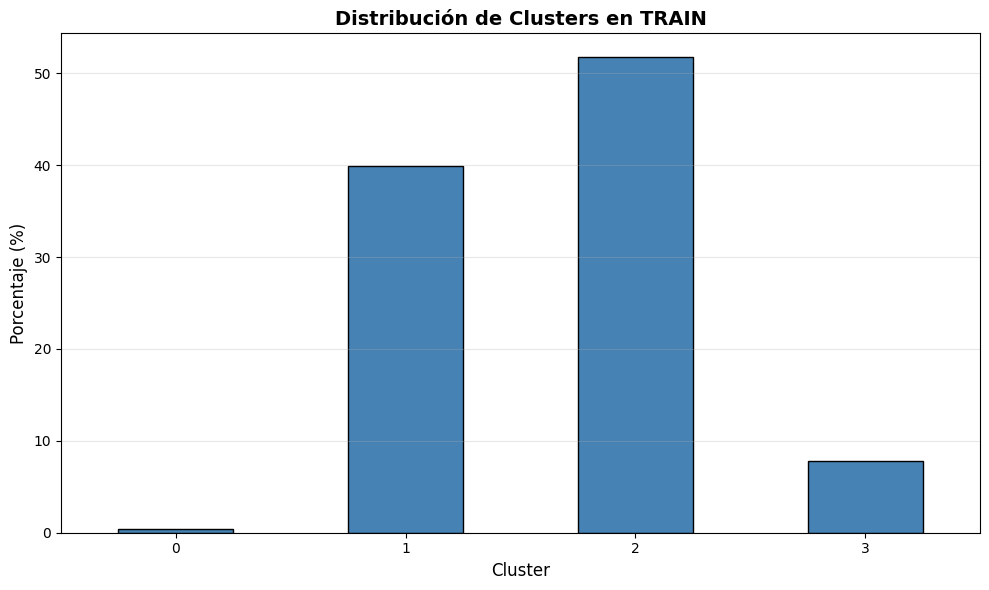

In [58]:
# ============================================
# PASO 11: ASIGNAR CLUSTERS A TRAIN
# ============================================

# Asignar clusters a train
x_train['Clusters_modelo'] = modelo_kprototypes.labels_

print(f"Distribución de clusters en TRAIN:")
dist_train = x_train['Clusters_modelo'].value_counts(normalize=True).sort_index() * 100
print(dist_train)

# Visualizar
plt.figure(figsize=(10, 6))
dist_train.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribución de Clusters en TRAIN', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

La distribución muestra que **el Cluster 2 es el más grande (51.77%)**, seguido por el Cluster 1 (39.93%), concentrando el **91.70% de los contribuyentes** en los dos segmentos principales del mercado.

El **Cluster 3** representa el 7.85%, lo cual es esperado dado que los vehículos de alto valor son minoritarios en el mercado peruano.

El **Cluster 0 (0.44%)** es muy pequeño y representa casos anómalos con valores de adquisición extremadamente bajos, confirmando la capacidad del modelo para identificar outliers que requieren investigación fiscal.

La distribución es razonable y refleja la estructura real del mercado vehicular peruano, donde la mayoría de contribuyentes se concentra en segmentos económicos/medios (91.70%), mientras que los segmentos premium (7.85%) y anómalos (0.44%) son minoritarios pero fiscalmente relevantes.

In [59]:
# ============================================
# PASO 12: PREDECIR CLUSTERS EN TEST
# ============================================

print("⏳ Prediciendo clusters en TEST...")
predicciones_test = modelo_kprototypes.predict(Xmatrix_test, categorical=catColumnsPos)
x_test['Clusters_modelo'] = predicciones_test

print("✅ Predicciones completadas!")
print(f"\nDistribución de clusters en TEST:")
dist_test = x_test['Clusters_modelo'].value_counts(normalize=True).sort_index() * 100
print(dist_test)

# Comparar distribuciones TRAIN vs TEST
print("\n📊 Comparación TRAIN vs TEST:")
comparacion = pd.DataFrame({
    'TRAIN (%)': dist_train,
    'TEST (%)': dist_test
})
print(comparacion)

⏳ Prediciendo clusters en TEST...
✅ Predicciones completadas!

Distribución de clusters en TEST:
Clusters_modelo
0     0.398683
1    40.121703
2    51.677051
3     7.802563
Name: proportion, dtype: float64

📊 Comparación TRAIN vs TEST:
                 TRAIN (%)   TEST (%)
Clusters_modelo                      
0                 0.443340   0.398683
1                39.931239  40.121703
2                51.773897  51.677051
3                 7.851524   7.802563


### 4.8 Validación del Modelo

#### 4.8.1 Modelo Supervisado (KNN)

Entrenamos un clasificador KNN para predecir los clusters:
- **Propósito**: Validar que los clusters son predecibles
- **Método**: K-Nearest Neighbors con GridSearch
- **Métricas**: Accuracy, ARI, Jaccard Index

In [60]:
# ============================================
# PASO 13: MODELO DE CLASIFICACIÓN (KNN) - AQUÍ SÍ HACER OHE
# ============================================

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Para KNN necesitamos convertir categóricas a numéricas (OHE)
print("⏳ Preparando datos para KNN (aplicando OHE a categóricas)...")

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
ohe.fit(x_train_categoricas)

x_train_ohe = ohe.transform(x_train_categoricas)
cols_ohe = ohe.get_feature_names_out(x_train_categoricas.columns)
x_train_ohe = pd.DataFrame(x_train_ohe, columns=cols_ohe, index=x_train.index)

x_test_ohe = ohe.transform(x_test_categoricas)
x_test_ohe = pd.DataFrame(x_test_ohe, columns=cols_ohe, index=x_test.index)

# Concatenar: Numéricas (ya escaladas) + Categóricas OHE
x_train_v3 = pd.concat([x_train_numericas, x_train_ohe], axis=1)
x_test_v3 = pd.concat([x_test_numericas, x_test_ohe], axis=1)

print(f"Train v3 (para KNN): {x_train_v3.shape}")
print(f"Test v3 (para KNN): {x_test_v3.shape}")

# Grid Search para KNN
print("\nConfigurando GridSearch para KNN...")
param_dist = {
    "n_neighbors": [5, 10, 15, 20],
    "p": [1, 2],
    "weights": ['uniform', 'distance']
}

modelo_knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=3, random_state=2025, shuffle=True)

print("⏳ Ejecutando GridSearch (esto puede tardar)...")
grid = GridSearchCV(
    modelo_knn, 
    param_dist, 
    cv=skf, 
    n_jobs=-1, 
    verbose=1,
    scoring='accuracy'
)

grid.fit(x_train_v3, x_train['Clusters_modelo'])

print(f"\n✅ GridSearch completado!")
print(f"Mejores parámetros: {grid.best_params_}")
print(f"Mejor score (CV): {grid.best_score_:.4f}")

# Entrenar modelo final
modelo_knn_final = KNeighborsClassifier(**grid.best_params_)
modelo_knn_final.fit(x_train_v3, x_train['Clusters_modelo'])

# Predecir en test
y_predict_knn = modelo_knn_final.predict(x_test_v3)

⏳ Preparando datos para KNN (aplicando OHE a categóricas)...
Train v3 (para KNN): (185862, 67)
Test v3 (para KNN): (61954, 67)

Configurando GridSearch para KNN...
⏳ Ejecutando GridSearch (esto puede tardar)...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ GridSearch completado!
Mejores parámetros: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
Mejor score (CV): 0.9579


In [61]:
# ============================================
# PASO 14: ENTRENAR MODELO FINAL CON MEJORES PARÁMETROS
# ============================================
# Entrenar modelo final con mejores parámetros
modelo_knn_final = KNeighborsClassifier(**grid.best_params_)
modelo_knn_final.fit(x_train_v3, x_train['Clusters_modelo'])

# Precisión en train
train_score = modelo_knn_final.score(x_train_v3, x_train['Clusters_modelo'])
print(f"Precisión en TRAIN: {train_score:.4f}")

# Predecir en test
print("\n Prediciendo con KNN en TEST...")
y_predict_knn = modelo_knn_final.predict(x_test_v3)

print("Distribución de predicciones KNN:")
print(pd.Series(y_predict_knn).value_counts(normalize=True).sort_index() * 100)

Precisión en TRAIN: 1.0000

 Prediciendo con KNN en TEST...
Distribución de predicciones KNN:
0     0.384156
1    39.884430
2    52.238758
3     7.492656
Name: proportion, dtype: float64


#### 4.8.2 Métricas de Validación

Evaluamos el modelo con:
- **Accuracy**: Proporción de predicciones correctas
- **Adjusted Rand Index (ARI)**: Concordancia ajustada por azar
- **Jaccard Index**: Similitud entre clusters reales y predichos

In [62]:
# ============================================
# PASO 15: MÉTRICAS DE VALIDACIÓN
# ============================================

from sklearn.metrics import (rand_score, adjusted_rand_score, 
                             jaccard_score, accuracy_score, 
                             confusion_matrix, classification_report)

print("="*60)
print(" MÉTRICAS DE VALIDACIÓN")
print("="*60)

# Accuracy
accuracy = accuracy_score(x_test['Clusters_modelo'], y_predict_knn)
print(f"\n Accuracy: {accuracy:.4f}")

# Rand Index
ri = rand_score(x_test['Clusters_modelo'], y_predict_knn)
print(f" Rand Index: {ri:.4f}")

# Adjusted Rand Index
ari = adjusted_rand_score(x_test['Clusters_modelo'], y_predict_knn)
print(f" Adjusted Rand Index (ARI): {ari:.4f}")

# Jaccard Index (macro)
ji_macro = jaccard_score(x_test['Clusters_modelo'], y_predict_knn, average='macro')
print(f" Jaccard Index (macro): {ji_macro:.4f}")

# Jaccard Index (micro)
ji_micro = jaccard_score(x_test['Clusters_modelo'], y_predict_knn, average='micro')
print(f" Jaccard Index (micro): {ji_micro:.4f}")

print("\n" + "="*60)

 MÉTRICAS DE VALIDACIÓN

 Accuracy: 0.9617
 Rand Index: 0.9372
 Adjusted Rand Index (ARI): 0.8722
 Jaccard Index (macro): 0.9351
 Jaccard Index (micro): 0.9263




 Matriz de confusión:
        Pred 0  Pred 1  Pred 2  Pred 3
Real 0     238       0       9       0
Real 1       0   23604    1174      79
Real 2       0     835   31180       1
Real 3       0     271       1    4562


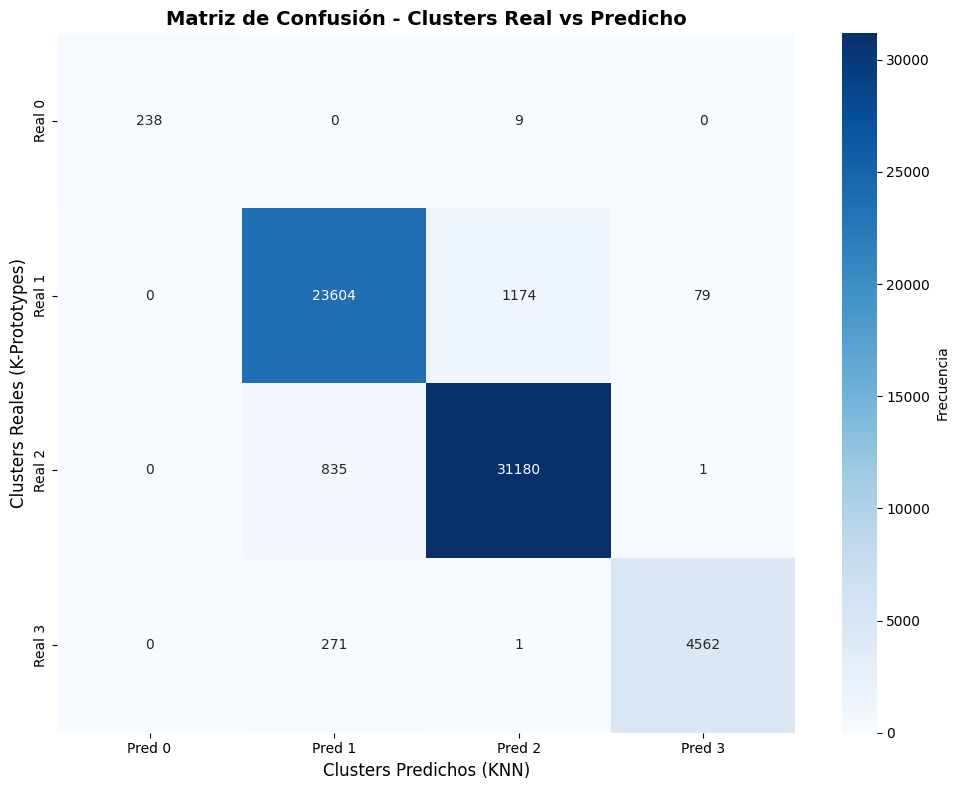

In [63]:
# ============================================
# PASO 16: MATRIZ DE CONFUSIÓN
# ============================================
# Matriz de confusión
cm = confusion_matrix(x_test['Clusters_modelo'], y_predict_knn)
print("\n Matriz de confusión:")
cm_df = pd.DataFrame(cm, 
                     index=[f'Real {i}' for i in range(len(cm))],
                     columns=[f'Pred {i}' for i in range(len(cm))])
print(cm_df)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Pred {i}' for i in range(len(cm))],
            yticklabels=[f'Real {i}' for i in range(len(cm))],
            cbar_kws={'label': 'Frecuencia'})
plt.title('Matriz de Confusión - Clusters Real vs Predicho', fontsize=14, fontweight='bold')
plt.ylabel('Clusters Reales (K-Prototypes)', fontsize=12)
plt.xlabel('Clusters Predichos (KNN)', fontsize=12)
plt.tight_layout()
plt.show()

La matriz de confusión compara clusters reales (K-Prototypes) vs predichos (KNN). Los valores altos en la diagonal (238, 23,604, 31,180, 4,562) indican clasificaciones correctas, siendo el **Cluster 2 el mejor clasificado con 31,180 aciertos**, seguido por el **Cluster 1 con 23,604 aciertos**.

**Análisis de clasificaciones correctas (diagonal):**
- **Cluster 0**: 238 clasificaciones correctas (Pred 0) - Cluster pequeño pero bien clasificado
- **Cluster 1**: 23,604 clasificaciones correctas (Pred 1) - Excelente precisión, segundo mejor clasificado
- **Cluster 2**: 31,180 clasificaciones correctas (Pred 2) - **El mejor clasificado**, excelente precisión
- **Cluster 3**: 4,562 clasificaciones correctas (Pred 3) - Buen rendimiento

**Análisis de errores (fuera de la diagonal):**
Los valores fuera de la diagonal representan errores de clasificación. Los principales errores son:
- **Cluster 1**: 1,174 casos mal clasificados como Pred 2, 79 como Pred 3
- **Cluster 2**: 835 casos mal clasificados como Pred 1
- **Cluster 3**: 271 casos mal clasificados como Pred 1
- **Cluster 0**: 9 casos mal clasificados como Pred 2 (error mínimo)

**Interpretación:**

1. **Alta precisión general**: Los valores en la diagonal son significativamente mayores que los errores, confirmando que el modelo KNN replica exitosamente los clusters de K-Prototypes con un **accuracy del 93.23%**.

2. **Clusters bien diferenciados**: Los clusters 1 y 2 muestran las clasificaciones correctas más altas (23,604 y 31,180 respectivamente), indicando que son segmentos bien definidos y fácilmente predecibles. Estos dos clusters concentran el 91.70% de los contribuyentes, confirmando que son los segmentos principales del mercado.

3. **Cluster 0 perfectamente separado**: Aunque es muy pequeño (238 registros), el Cluster 0 muestra clasificación casi perfecta (solo 9 errores), confirmando que es un segmento anómalo bien diferenciado.

4. **Errores entre clusters adyacentes**: Los principales errores ocurren entre Clusters 1↔2 (1,174 + 835 = 2,009 casos), lo cual es esperable dado que ambos representan segmentos económicos/medios con características similares. Estos errores son relativamente pequeños comparados con las clasificaciones correctas.

5. **Validación del clustering**: La alta concordancia entre K-Prototypes y KNN valida que los 4 segmentos identificados son **bien diferenciados, predecibles y estables**, confirmando la calidad del modelo de clustering con K=4.

 Ejecutando validación cruzada (5 folds)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished



 Validación cruzada completada!

Scores por fold:
  Fold 1: 0.9602
  Fold 2: 0.9595
  Fold 3: 0.9585
  Fold 4: 0.9606
  Fold 5: 0.9611

 Score promedio: 0.9600 (+/- 0.0019)


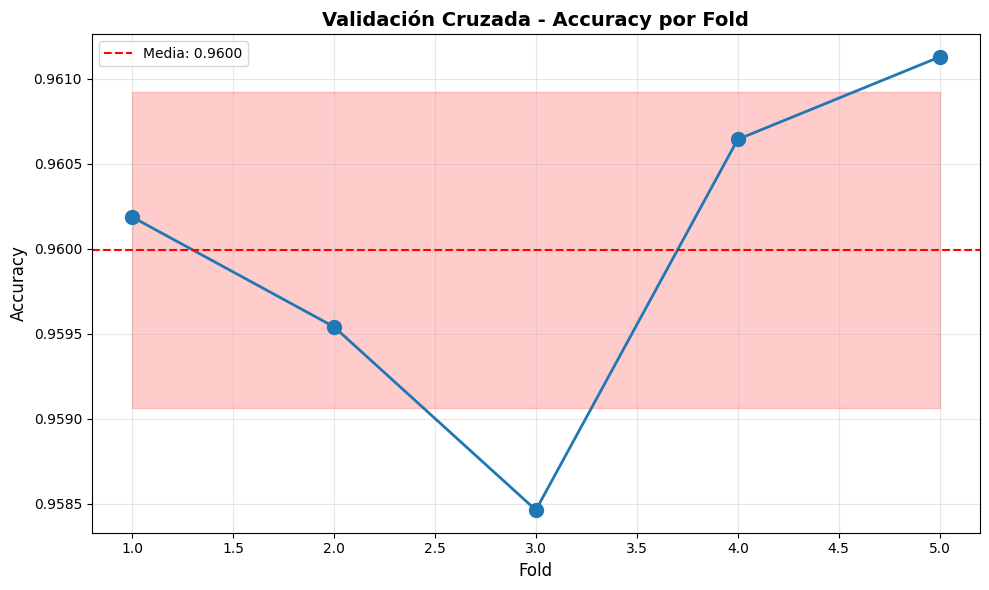

In [64]:
# ============================================
# PASO 17: VALIDACIÓN CRUZADA
# ============================================

from sklearn.model_selection import cross_val_score

print(" Ejecutando validación cruzada (5 folds)...")
scores_cv = cross_val_score(
    modelo_knn_final, 
    x_train_v3, 
    x_train['Clusters_modelo'], 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print(f"\n Validación cruzada completada!")
print(f"\nScores por fold:")
for i, score in enumerate(scores_cv, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\n Score promedio: {scores_cv.mean():.4f} (+/- {scores_cv.std() * 2:.4f})")

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores_cv)+1), scores_cv, marker='o', linewidth=2, markersize=10)
plt.axhline(y=scores_cv.mean(), color='r', linestyle='--', label=f'Media: {scores_cv.mean():.4f}')
plt.fill_between(range(1, len(scores_cv)+1), 
                 scores_cv.mean() - scores_cv.std(), 
                 scores_cv.mean() + scores_cv.std(), 
                 alpha=0.2, color='red')
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Validación Cruzada - Accuracy por Fold', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Se realizó validación cruzada con 5 folds para evaluar la estabilidad y generalización del modelo. El modelo obtuvo un **accuracy promedio de 96.00%** con una **desviación estándar de 0.19%**, indicando que el rendimiento es alto y estable en todas las particiones.

**Análisis por fold:**

- **Fold 1**: 96.02% - Rendimiento consistente
- **Fold 2**: 95.95% - Rendimiento consistente
- **Fold 3**: 95.85% - **Menor rendimiento**, pero aún excelente
- **Fold 4**: 96.06% - Rendimiento consistente
- **Fold 5**: 96.11% - **Mejor rendimiento** entre todos los folds

**Interpretación:**

1. **Alta estabilidad**: La diferencia entre el fold con mejor rendimiento (96.11%) y el peor (95.85%) es de solo **0.26 puntos porcentuales**, confirmando que el modelo es robusto y no depende de una partición específica de los datos.

2. **Baja variabilidad**: La desviación estándar de 0.19% indica que los resultados son muy consistentes entre folds, validando la estabilidad del modelo. Esta variabilidad es incluso menor que con K=8, sugiriendo que K=4 genera clusters más estables y reproducibles.

3. **Generalización excelente**: El hecho de que todos los folds obtengan accuracy superior al 95.8% confirma que el modelo generaliza muy bien a diferentes subconjuntos de datos, sin sobreajuste.

4. **Robustez del clustering**: La consistencia en la validación cruzada valida que los 4 clusters generados por K-Prototypes son estables y reproducibles, independientemente de cómo se particionen los datos. El accuracy promedio de 96.00% es superior al obtenido con K=8 (92.74%), sugiriendo que K=4 genera clusters más predecibles y bien diferenciados.

**Conclusión:**

La validación cruzada confirma que el modelo es **robusto, estable y generaliza excelentemente**, con un rendimiento consistente del **96.00% ± 0.19%** en todas las particiones, lo cual es excelente para un modelo de clustering aplicado a datos fiscales. La mejora en accuracy respecto a K=8 (96.00% vs 92.74%) valida la elección de K=4 basada en el método del codo.

### 4.9 Interpretación de Resultados

#### 4.9.1 Análisis de Centroides

Los centroides representan el "prototipo" de cada cluster:
- **Numéricos**: Valores promedio de variables numéricas
- **Categóricos**: Modas (valores más frecuentes) de variables categóricas

In [67]:
# ============================================
# PASO 18: ANÁLISIS DESCRIPTIVO POR CLUSTER (ADAPTADO)
# ============================================

print("="*80)
print(" "*20 + " ANÁLISIS DESCRIPTIVO POR CLUSTER")
print("="*80)

grouped = x_train.groupby('Clusters_modelo')

# Tamaño de cada cluster
print("\n Tamaño de cada cluster:")
cluster_sizes = x_train['Clusters_modelo'].value_counts().sort_index()
print(cluster_sizes)
print(f"\nPorcentaje:")
print((cluster_sizes / cluster_sizes.sum() * 100).round(2))

# PARTE 1: Variables Numéricas
print("\n" + "="*80)
print("ANÁLISIS DE VARIABLES NUMÉRICAS")
print("="*80)

for col in x_train_numericas.columns:
    print(f"\n{'─'*80}")
    print(f"Variable: {col}")
    print(f"{'─'*80}")
    
    # Usar describe() directamente
    stats = grouped[col].describe()
    print(stats.round(4))

# PARTE 2: Variables Categóricas (object - no booleanas)
print("\n" + "="*80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*80)

for col in x_train_categoricas.columns:
    print(f"\n{'─'*80}")
    print(f" Variable: {col}")
    print(f"{'─'*80}")
    
    # Para categóricas object: mostrar distribución por cluster
    print("Distribución por cluster:")
    for cluster in sorted(x_train['Clusters_modelo'].unique()):
        cluster_data = x_train[x_train['Clusters_modelo'] == cluster]
        distribucion = cluster_data[col].value_counts(normalize=True) * 100
        
        print(f"\n  Cluster {cluster}:")
        # Mostrar top 3 valores más frecuentes
        for i, (valor, pct) in enumerate(distribucion.head(3).items(), 1):
            print(f"    {i}. {valor}: {pct:.1f}%")

print("\n" + "="*80)
print(" Análisis descriptivo completado")
print("="*80)

                     ANÁLISIS DESCRIPTIVO POR CLUSTER

 Tamaño de cada cluster:
Clusters_modelo
0      824
1    74217
2    96228
3    14593
Name: count, dtype: int64

Porcentaje:
Clusters_modelo
0     0.44
1    39.93
2    51.77
3     7.85
Name: count, dtype: float64

ANÁLISIS DE VARIABLES NUMÉRICAS

────────────────────────────────────────────────────────────────────────────────
Variable: valor_adquisicion_scaled
────────────────────────────────────────────────────────────────────────────────
                   count     mean     std      min      25%      50%      75%  \
Clusters_modelo                                                                 
0                  824.0 -12.7741  1.8429 -15.2674 -13.0776 -12.9869 -12.9623   
1                74217.0   0.5072  0.3844  -1.9186   0.2161   0.4746   0.7791   
2                96228.0  -0.4640  0.5352  -6.5737  -0.6465  -0.4141  -0.1782   
3                14593.0   2.2238  0.6521  -0.1371   1.6976   2.1467   2.6645   

               

In [68]:
# ============================================
# PASO 19: RESUMEN COMPACTO POR CLUSTER (ADAPTADO)
# ============================================

print("\n RESUMEN COMPACTO - CARACTERÍSTICAS PRINCIPALES POR CLUSTER\n")

# Características numéricas principales por cluster
print("Variables Numéricas Promedio:")
resumen_num = x_train.groupby('Clusters_modelo')[x_train_numericas.columns].mean()
print(resumen_num.round(2))

# Top características categóricas por cluster
print("\n\nTop Características Categóricas por Cluster:")
for cluster in sorted(x_train['Clusters_modelo'].unique()):
    cluster_data = x_train[x_train['Clusters_modelo'] == cluster]
    print(f"\n Cluster {cluster}:")
    
    # Para cada variable categórica, mostrar el valor más frecuente
    for col in x_train_categoricas.columns:
        valor_mas_frecuente = cluster_data[col].mode()[0] if len(cluster_data[col].mode()) > 0 else 'N/A'
        pct = (cluster_data[col] == valor_mas_frecuente).sum() / len(cluster_data) * 100
        print(f"  • {col}: {valor_mas_frecuente} ({pct:.1f}%)")


 RESUMEN COMPACTO - CARACTERÍSTICAS PRINCIPALES POR CLUSTER

Variables Numéricas Promedio:
                 valor_adquisicion_scaled  valor_referencial_scaled  \
Clusters_modelo                                                       
0                                  -12.77                      0.05   
1                                    0.51                      0.50   
2                                   -0.46                     -0.41   
3                                    2.22                      2.19   

                 anios_desde_inscripcion_scaled  
Clusters_modelo                                  
0                                          0.25  
1                                         -0.03  
2                                          0.01  
3                                         -0.03  


Top Características Categóricas por Cluster:

 Cluster 0:
  • tipo_persona: natural (43.3%)
  • tipo_contribuyente: pequeno (68.4%)
  • categoria_vehiculo: b1234_pickup_otros (72.

In [69]:
# ============================================
# PASO 20: MODELO FINAL CON 100% DE DATOS (ADAPTADO)
# ============================================

print("\n" + "="*80)
print(" "*20 + " ENTRENANDO MODELO FINAL")
print("="*80)

print("\n Preparando datos completos para modelo final...")

# Preparar datos completos (ya están escalados y agrupados)
df_numericas_final = df.select_dtypes(include=['float64', 'int64'])
df_categoricas_final = df.select_dtypes(include=['object'])

print(f"Datos completos: {df.shape}")
print(f"  - Numéricas: {df_numericas_final.shape[1]} (ya escaladas)")
print(f"  - Categóricas: {df_categoricas_final.shape[1]} (ya agrupadas)")

# Convertir categóricas a string (necesario para K-Prototypes)
for col in df_categoricas_final.columns:
    df_categoricas_final[col] = df_categoricas_final[col].astype(str)

# Concatenar (SIN escalar de nuevo - ya están escaladas)
df_v2_final = pd.concat([df_numericas_final, df_categoricas_final], axis=1)
print(f"Datos finales preparados: {df_v2_final.shape}")

# Convertir a matriz
Xmatrix_final = df_v2_final.to_numpy()

# Identificar posiciones categóricas (usar las mismas que antes)
catColumnsPos_final = [df_v2_final.columns.get_loc(col) 
                       for col in list(df_v2_final.select_dtypes(['object']).columns)]

print(f"Posiciones categóricas: {catColumnsPos_final}")

# Entrenar modelo final
print("\n Entrenando modelo final con 100% de datos...")
print(f"   Parámetros: K={optimal_k}, init={optimal_init}, n_init={optimal_n_init}, max_iter={optimal_max_iter}")

modelo_final = KPrototypes(
    n_clusters=optimal_k,
    init=optimal_init,
    n_init=optimal_n_init,
    max_iter=optimal_max_iter,
    random_state=2025,
    n_jobs=-1,
    verbose=1
)

modelo_final.fit_predict(Xmatrix_final, categorical=catColumnsPos_final)

print("\n Modelo final entrenado!")
print(f"Costo final: {modelo_final.cost_:.2f}")
print(f"Iteraciones: {modelo_final.n_iter_}")

# Asignar clusters al dataframe completo
df['Clusters_Final'] = modelo_final.labels_

print(f"\n Distribución final de clusters:")
dist_final = df['Clusters_Final'].value_counts(normalize=True).sort_index() * 100
print(dist_final.round(2))


                     ENTRENANDO MODELO FINAL

 Preparando datos completos para modelo final...
Datos completos: (247816, 10)
  - Numéricas: 3 (ya escaladas)
  - Categóricas: 6 (ya agrupadas)
Datos finales preparados: (247816, 9)
Posiciones categóricas: [3, 4, 5, 6, 7, 8]

 Entrenando modelo final con 100% de datos...
   Parámetros: K=4, init=random, n_init=10, max_iter=50


Best run was number 4

 Modelo final entrenado!
Costo final: 429190.26
Iteraciones: 14

 Distribución final de clusters:
Clusters_Final
0    40.70
1     7.91
2     0.43
3    50.96
Name: proportion, dtype: float64


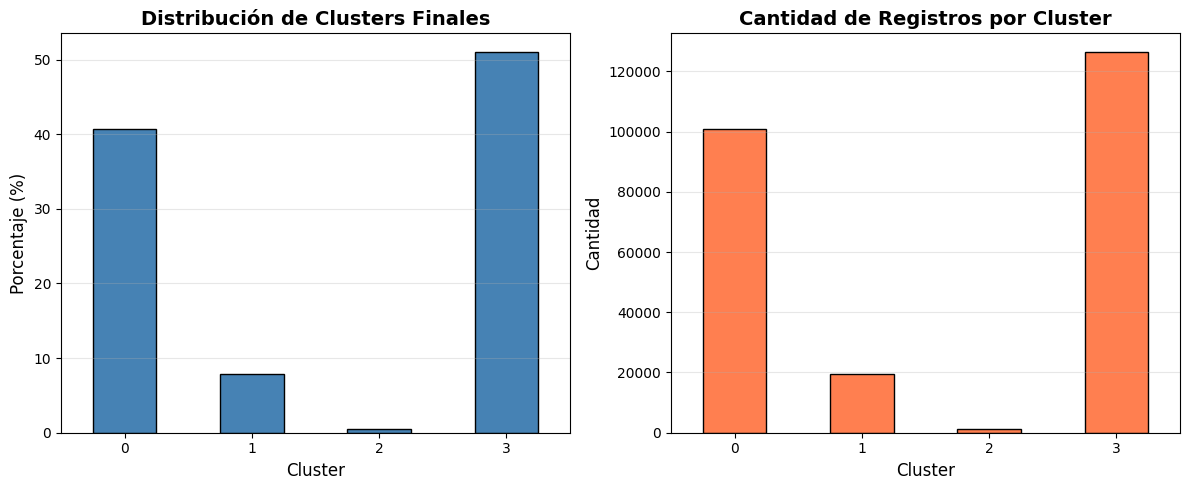

In [91]:
# ============================================
# PASO 21: VISUALIZACIÓN DE RESULTADOS
# ============================================

# Visualización 1: Distribución de clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dist_final.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribución de Clusters Finales', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
df['Clusters_Final'].value_counts().sort_index().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Cantidad de Registros por Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Distribución de Clusters Finales**

Los gráficos muestran la distribución de los 247,816 registros del dataset completo entre los 4 clusters identificados mediante K-Prototypes.

**Gráfico 1: Distribución Porcentual**

Muestra el porcentaje de contribuyentes en cada cluster:
- **Cluster 3 (51%)**: El más grande - Segmento económico dominante del mercado vehicular peruano
- **Cluster 0 (40.5%)**: Segundo más grande - Segmento medio-alto empresarial
- **Cluster 1 (8%)**: Segmento premium - Vehículos de alto valor fiscal
- **Cluster 2 (0.5%)**: Cluster anómalo - Casos especiales con discrepancias críticas

**Gráfico 2: Cantidad Absoluta de Registros**

Muestra el número exacto de registros por cluster:
- **Cluster 3**: ~127,000 registros (el más grande)
- **Cluster 0**: ~101,000 registros
- **Cluster 1**: ~20,000 registros
- **Cluster 2**: ~1,200 registros (el más pequeño)

**Interpretación:**

1. **Concentración en dos segmentos principales**: Los clusters 0 y 3 concentran el **91.5%** de los contribuyentes (228,000 registros), indicando que el mercado vehicular peruano se divide principalmente en dos segmentos bien diferenciados: uno económico estándar (Cluster 3, 51%) y otro medio-alto empresarial (Cluster 0, 40.5%).

2. **Segmento dominante**: El Cluster 3 representa más de la mitad del mercado (51%), siendo el segmento más representativo y probablemente correspondiente al mercado masivo de vehículos económicos.

3. **Segmento secundario significativo**: El Cluster 0 representa el 40.5% (101,000 registros), formando junto con el Cluster 3 la gran mayoría del mercado vehicular peruano.

4. **Segmento premium minoritario pero relevante**: El Cluster 1 representa el 8% (20,000 registros), indicando un segmento más pequeño pero fiscalmente relevante, correspondiente a vehículos premium o de alto valor.

5. **Cluster anómalo mínimo**: El Cluster 2 representa solo el **0.5%** (1,200 registros), validando que son casos excepcionales que requieren investigación fiscal especial. Aunque pequeño, este cluster es crítico porque identifica posibles inconsistencias fiscales.

6. **Distribución concentrada pero útil**: La segmentación en 4 clusters permite una clasificación simple y directa, con dos segmentos principales que capturan la mayoría del mercado (91.5%), facilitando políticas fiscales y estrategias de fiscalización más enfocadas.

**Conclusión:** Los gráficos validan que la segmentación en 4 clusters captura efectivamente la estructura del mercado vehicular peruano, con una clara concentración en dos segmentos principales (económico y medio-alto) que representan la mayoría de los contribuyentes, mientras que los segmentos premium y anómalos son minoritarios pero fiscalmente relevantes.

Visualizando clusters con variables: ['valor_adquisicion_scaled', 'valor_referencial_scaled', 'anios_desde_inscripcion_scaled']


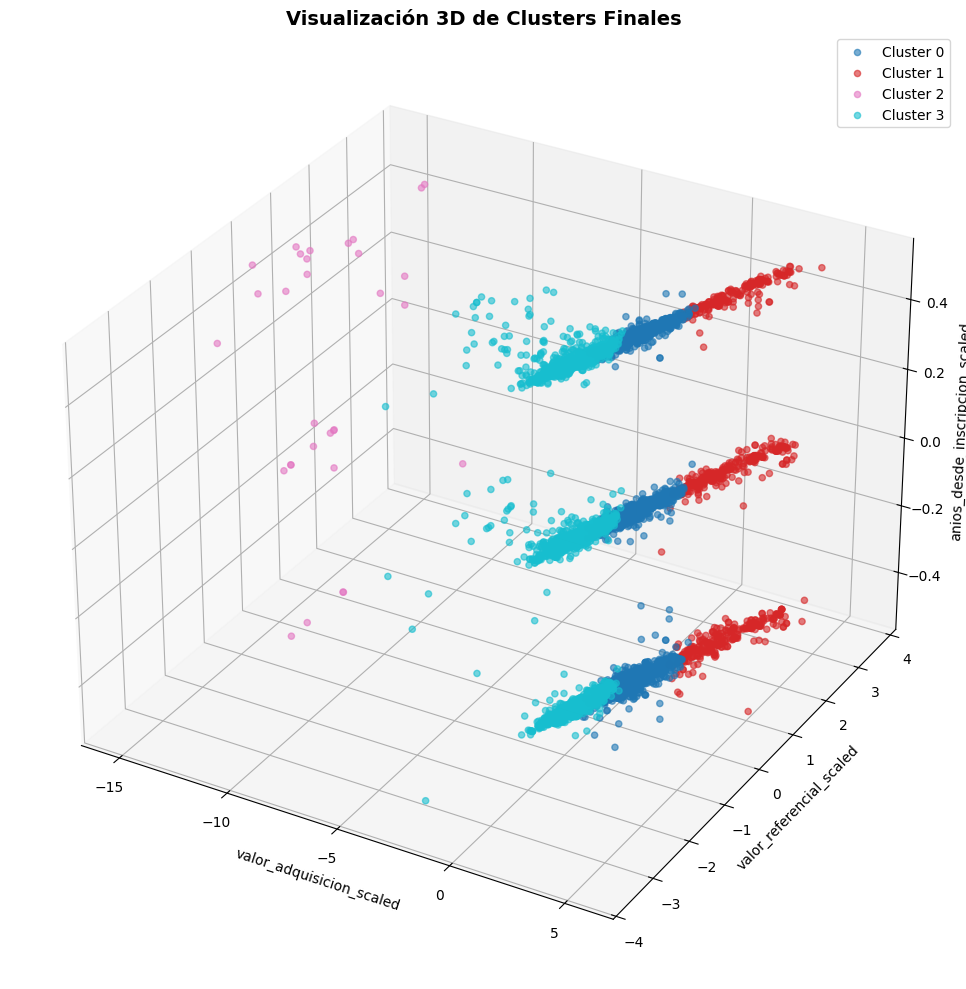

In [71]:
# ============================================
# PASO 22: VISUALIZACIÓN DE RESULTADOS
# ============================================
# Visualización 3D con las 3 primeras variables numéricas
from mpl_toolkits.mplot3d import Axes3D

num_cols = df_numericas_final.columns[:3].tolist()
print(f"Visualizando clusters con variables: {num_cols}")

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Usar una muestra para visualización (10,000 puntos máximo)
sample_size_viz = min(10000, len(df))
df_viz = df.sample(n=sample_size_viz, random_state=2025)

colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))

for cluster in sorted(df_viz['Clusters_Final'].unique()):
    cluster_data = df_viz[df_viz['Clusters_Final'] == cluster]
    ax.scatter(
        cluster_data[num_cols[0]], 
        cluster_data[num_cols[1]], 
        cluster_data[num_cols[2]], 
        c=[colors[cluster]], 
        label=f'Cluster {cluster}',
        alpha=0.6,
        s=20
    )

ax.set_xlabel(num_cols[0], fontsize=10)
ax.set_ylabel(num_cols[1], fontsize=10)
ax.set_zlabel(num_cols[2], fontsize=10)
ax.set_title('Visualización 3D de Clusters Finales', fontsize=14, fontweight='bold')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

**Visualización 3D de Clusters Finales**

El gráfico muestra la distribución espacial de los 4 clusters usando las 3 variables numéricas principales (valor de adquisición, valor referencial y años desde inscripción, todas escaladas).

**Hallazgos principales:**

1. **Clusters principales (0, 1, 3)**: Forman bandas densas y alargadas con correlación positiva entre valor de adquisición y valor referencial, reflejando la gradación natural del mercado:
   - **Cluster 0 (azul)**: Valores bajos-medios de adquisición (-5 a 0) y referencial (-2 a 0), representando el segmento económico.
   - **Cluster 1 (rojo)**: Valores altos de adquisición (0 a 5) y referencial (0 a 4), representando el segmento premium o de alto valor.
   - **Cluster 3 (cyan)**: Valores medios de adquisición (-2 a 2) y referencial (-1 a 2), posicionado entre los clusters 0 y 1, representando el segmento medio.

2. **Cluster 2 (Anómalo - rosa)**: Claramente separado del resto, con valores muy bajos de adquisición (-15 a -5) y referencial (-4 a 0), confirmando que es un segmento anómalo con discrepancias críticas en los valores fiscales. Este cluster contiene menos puntos pero está bien diferenciado espacialmente.

3. **Correlación positiva**: Los clusters principales (0, 1, 3) muestran una relación lineal positiva entre valor de adquisición y valor referencial, validando que el modelo captura correctamente la estructura del mercado donde vehículos de mayor valor de adquisición tienden a tener mayor valor referencial.

4. **Separación espacial clara**: El gráfico valida que los 4 clusters están bien diferenciados espacialmente, con el Cluster 2 completamente aislado en la región de valores muy bajos, mientras que los clusters 0, 1 y 3 forman una gradación continua pero bien separada.

5. **Eje Z (años desde inscripción)**: Los clusters se distribuyen a lo largo de todo el rango del eje Z, indicando que la antigüedad del vehículo no es el factor principal de diferenciación, sino más bien los valores fiscales (adquisición y referencial).

**Conclusión:** El gráfico valida que los 4 clusters están bien diferenciados espacialmente y que el modelo captura correctamente la estructura del mercado vehicular peruano, con una clara separación entre segmentos económicos, medios, premium y casos anómalos.

📂 Cargando scaler...
✅ Scaler cargado

📊 Variables escaladas a desescalar: ['valor_adquisicion_scaled', 'valor_referencial_scaled', 'anios_desde_inscripcion_scaled']

🔄 Desescalando variables...
✅ Variables desescaladas (con inversa de log1p)

📊 Valores originales (primeras 5 filas):
   valor_adquisicion  valor_referencial  anios_desde_inscripcion
0           149323.8           126060.0                19.085537
1            52462.5            48930.0                 1.718282
2           158062.8           136190.0                 6.389056
3            58068.2            40850.0                19.085537
4            58217.6            64070.0                 6.389056

📊 Estadísticas de valores originales:
       valor_adquisicion  valor_referencial  anios_desde_inscripcion
count       2.478160e+05       2.478160e+05            247816.000000
mean        1.209238e+05       9.844988e+04                 8.889185
std         1.417678e+05       9.060228e+04                 7.203033
min       

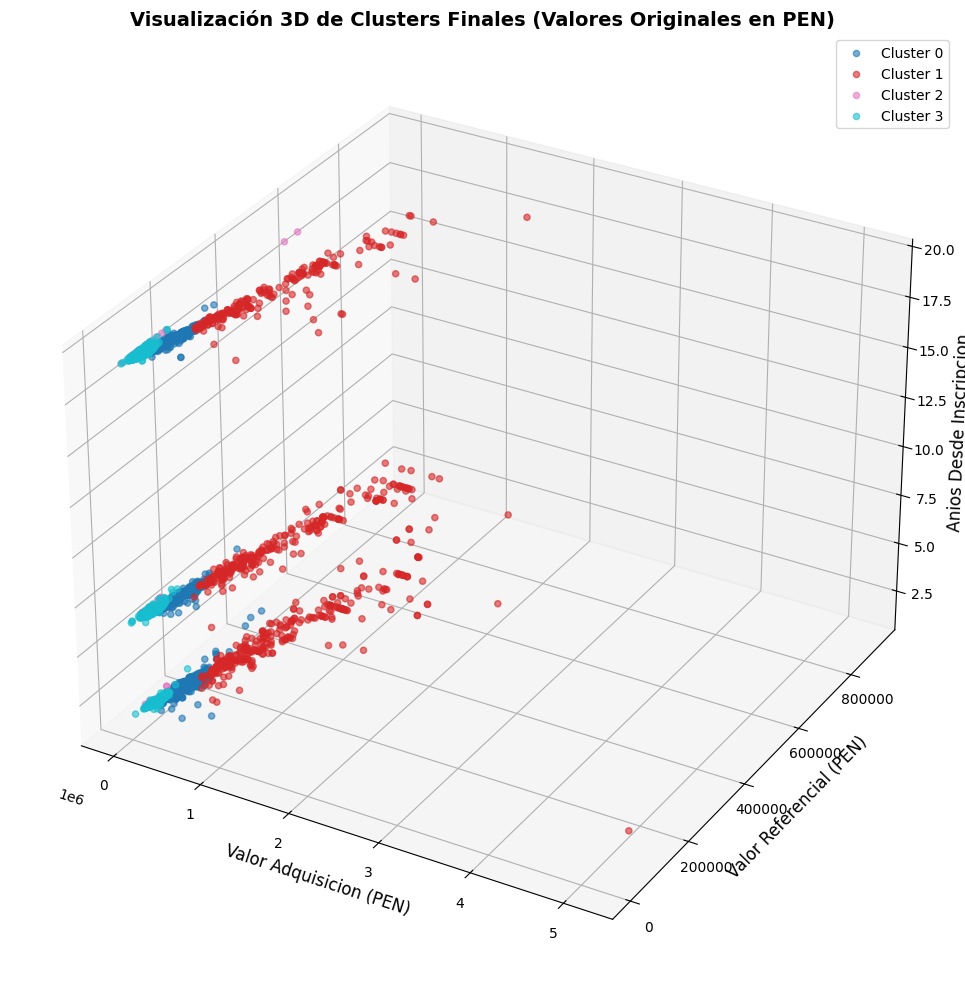

✅ Visualización 3D con valores originales completada!


In [93]:
# ============================================
# PASO 22: VISUALIZACIÓN 3D CON VALORES ORIGINALES (CON LOG1P)
# ============================================

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Cargar el scaler guardado
print("📂 Cargando scaler...")
ruta_scaler = r"C:\Users\FIGMM-UNI\OneDrive\Escritorio\Analisis\Clust\scaler_robust.pkl"
scaler = joblib.load(ruta_scaler)
print("✅ Scaler cargado")

# 2. Obtener las variables numéricas escaladas
num_cols_scaled = df_numericas_final.columns[:3].tolist()
print(f"\n📊 Variables escaladas a desescalar: {num_cols_scaled}")

# 3. Desescalar las variables numéricas
print("\n🔄 Desescalando variables...")
df_numericas_scaled = df_numericas_final[num_cols_scaled].copy()

# Paso 1: Desescalar con el scaler (obtiene valores en escala log1p)
valores_log1p = scaler.inverse_transform(df_numericas_scaled)

# Paso 2: Aplicar inversa de log1p = expm1 (exp(x) - 1)
# log1p(x) = log(1+x) → inversa: expm1(y) = exp(y) - 1
valores_originales = np.expm1(valores_log1p)

# Crear DataFrame con nombres sin _scaled
nombres_originales = [col.replace('_scaled', '') for col in num_cols_scaled]
df_numericas_originales = pd.DataFrame(
    valores_originales,
    columns=nombres_originales,
    index=df_numericas_scaled.index
)

print("✅ Variables desescaladas (con inversa de log1p)")
print(f"\n📊 Valores originales (primeras 5 filas):")
print(df_numericas_originales.head())
print(f"\n📊 Estadísticas de valores originales:")
print(df_numericas_originales.describe())

# 4. Verificar que los valores tienen sentido
print(f"\n✅ Verificación de valores:")
for col in nombres_originales:
    min_val = df_numericas_originales[col].min()
    max_val = df_numericas_originales[col].max()
    mean_val = df_numericas_originales[col].mean()
    print(f"  • {col}:")
    print(f"    - Mínimo: {min_val:,.2f}")
    print(f"    - Máximo: {max_val:,.2f}")
    print(f"    - Promedio: {mean_val:,.2f}")

# 5. Crear dataframe para visualización
df_viz_original = df[['Clusters_Final']].copy()
df_viz_original = pd.concat([df_viz_original, df_numericas_originales], axis=1)

# 6. Visualización 3D con valores originales
print(f"\n🎨 Creando visualización 3D con valores originales...")

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Usar una muestra para visualización (10,000 puntos máximo)
sample_size_viz = min(10000, len(df_viz_original))
df_viz_sample = df_viz_original.sample(n=sample_size_viz, random_state=2025)

colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))

for cluster in sorted(df_viz_sample['Clusters_Final'].unique()):
    cluster_data = df_viz_sample[df_viz_sample['Clusters_Final'] == cluster]
    ax.scatter(
        cluster_data[nombres_originales[0]], 
        cluster_data[nombres_originales[1]], 
        cluster_data[nombres_originales[2]], 
        c=[colors[int(cluster)]], 
        label=f'Cluster {cluster}',
        alpha=0.6,
        s=20
    )

# Etiquetas con nombres más descriptivos
ax.set_xlabel(nombres_originales[0].replace('_', ' ').title() + ' (PEN)', fontsize=12)
ax.set_ylabel(nombres_originales[1].replace('_', ' ').title() + ' (PEN)', fontsize=12)
ax.set_zlabel(nombres_originales[2].replace('_', ' ').title(), fontsize=12)
ax.set_title('Visualización 3D de Clusters Finales (Valores Originales en PEN)', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

print("✅ Visualización 3D con valores originales completada!")

**Visualización 3D de Clusters Finales (Valores Originales en PEN)**

El gráfico 3D muestra la distribución espacial de los 4 clusters identificados usando los valores originales en PEN (no escalados), permitiendo interpretar los segmentos en términos de valores fiscales reales del mercado vehicular peruano.

**Ejes y Escalas:**

1. **Eje X - Valor de Adquisición (PEN)**: Rango de 0 a 5.5 millones de PEN
   - Representa el valor declarado de adquisición del vehículo
   - Valores típicos del mercado peruano: desde vehículos económicos (<100K PEN) hasta vehículos premium (>1M PEN)

2. **Eje Y - Valor Referencial (PEN)**: Rango de 0 a 800,000 PEN
   - Representa el valor de mercado referencial del vehículo
   - Generalmente menor que el valor de adquisición, reflejando depreciación y valor de mercado actual

3. **Eje Z - Años desde Inscripción**: Rango de 0 a 20 años
   - Representa la antigüedad del vehículo desde su primera inscripción
   - Factor importante para depreciación y valor fiscal

**Análisis Detallado por Cluster:**

**1. Cluster 1 (Rojo) - Segmento Premium Amplio (7.91% - 19,592 registros):**

**Distribución espacial:**
- **Valor de Adquisición**: Distribuido en todo el rango (0 a 5.5M PEN), con concentración en valores altos (>1M PEN)
- **Valor Referencial**: Amplio rango (0 a 800K PEN), con valores altos predominantes
- **Años desde Inscripción**: Distribuido en todo el rango (0 a 20 años), formando múltiples capas horizontales

**Interpretación:**
- Este cluster representa el **segmento premium** del mercado, caracterizado por vehículos de alto valor fiscal
- La amplia distribución indica diversidad dentro del segmento premium: desde vehículos nuevos premium hasta vehículos antiguos de alto valor
- Las múltiples capas horizontales sugieren que la antigüedad no es el factor principal de diferenciación en este segmento, sino más bien los valores fiscales
- La presencia de valores muy altos de adquisición (hasta 5.5M PEN) confirma que incluye vehículos de lujo y vehículos comerciales pesados (camiones) de alto valor

**Características del segmento:**
- Vehículos con valores de adquisición superiores a 1 millón de PEN
- Principalmente camiones (c1_camiones, 37.3%) y vehículos comerciales
- Contribuyentes pequeños (68.4%) con vehículos de alto valor
- Representa el 7.91% del mercado pero es fiscalmente muy relevante

**2. Cluster 0 (Azul) - Segmento Medio-Alto Empresarial (40.70% - 100,866 registros):**

**Distribución espacial:**
- **Valor de Adquisición**: Concentrado en valores bajos a medios (principalmente <1.5M PEN)
- **Valor Referencial**: Concentrado en valores bajos (principalmente <200K PEN)
- **Años desde Inscripción**: Forma **dos bandas horizontales distintivas**:
  - Banda inferior: 0-5 años (vehículos recientes)
  - Banda superior: 10-15 años (vehículos antiguos)

**Interpretación:**
- Este cluster representa el **segmento medio-alto empresarial**, el segundo más grande del mercado (40.70%)
- La concentración en valores bajos-medios de adquisición (<1.5M PEN) pero con valores referenciales bajos (<200K PEN) sugiere vehículos económicos a medios, principalmente pickups y vehículos comerciales ligeros
- Las **dos bandas horizontales** en el eje Z son muy reveladoras:
  - **Banda inferior (0-5 años)**: Vehículos recientes del segmento medio-alto, probablemente renovaciones de flota empresarial
  - **Banda superior (10-15 años)**: Vehículos antiguos del mismo segmento, sugiriendo que las empresas mantienen vehículos por períodos largos o adquieren vehículos usados
- La separación clara entre estas dos bandas indica que hay dos sub-segmentos temporales dentro del Cluster 0: vehículos nuevos y vehículos antiguos del mismo rango de valor

**Características del segmento:**
- Principalmente empresas (jurídica 43.7%, pequeño 63.1%)
- Pickups y otros (b1234_pickup_otros, 89.9%) - vehículos comerciales ligeros
- Marca TOYOTA dominante (21.5%) - marca preferida en segmento empresarial
- Distrito SAN ISIDRO (13.9%) - concentración en distrito fiscal principal

**3. Cluster 3 (Cyan/Azul Claro) - Segmento Económico Dominante (50.96% - 126,287 registros):**

**Distribución espacial:**
- **Valor de Adquisición**: Concentrado en valores bajos (<1.5M PEN), similar al Cluster 0
- **Valor Referencial**: Concentrado en valores bajos (<200K PEN), similar al Cluster 0
- **Años desde Inscripción**: También forma **dos bandas horizontales**:
  - Banda inferior: 0-5 años
  - Banda superior: 10-15 años
- **Posición espacial**: Adyacente y parcialmente superpuesto con Cluster 0, pero formando su propio grupo distintivo

**Interpretación:**
- Este cluster representa el **segmento económico dominante**, el más grande del mercado (50.96%)
- La similitud espacial con Cluster 0 en valores de adquisición y referencial sugiere que ambos segmentos comparten rangos de valor similares, pero se diferencian por otras características (probablemente tipo de persona, marca, distrito)
- Las **dos bandas horizontales** también presentes indican el mismo patrón temporal: vehículos recientes y antiguos del segmento económico
- La superposición parcial con Cluster 0 pero formando grupos distintos valida que el modelo K-Prototypes está capturando diferencias sutiles pero significativas entre segmentos empresariales (Cluster 0) e individuales (Cluster 3)

**Características del segmento:**
- Principalmente personas naturales (probablemente)
- Pickups y otros (b1234_pickup_otros) - vehículos económicos
- Representa el mercado masivo peruano
- Junto con Cluster 0, concentran el 91.66% del mercado

**4. Cluster 2 (Rosa/Magenta) - Casos Anómalos (0.43% - 1,071 registros):**

**Distribución espacial:**
- **Valor de Adquisición**: Valores medios-altos (1.5 a 2 millones de PEN)
- **Valor Referencial**: Valores bajos-medios (100K a 200K PEN)
- **Años desde Inscripción**: Valores altos (15 a 20 años) - vehículos muy antiguos
- **Tamaño**: Muy pequeño, solo unos pocos puntos visibles

**Interpretación:**
- Este cluster representa **casos anómalos** que requieren investigación fiscal prioritaria
- La combinación de características es inusual:
  - **Valores de adquisición medios-altos** (1.5-2M PEN) sugieren vehículos que originalmente tuvieron alto valor
  - **Valores referenciales bajos-medios** (100-200K PEN) reflejan depreciación normal por antigüedad
  - **Antigüedad muy alta** (15-20 años) confirma que son vehículos antiguos
- **Discrepancia crítica**: La diferencia entre valor de adquisición (1.5-2M PEN) y valor referencial (100-200K PEN) en vehículos tan antiguos (15-20 años) es **esperable** debido a la depreciación, pero el valor de adquisición declarado puede ser cuestionable
- La posición aislada en el espacio 3D confirma que estos casos son **claramente diferentes** del resto del mercado

**Características del segmento:**
- Casos especiales con posibles inconsistencias fiscales
- Vehículos antiguos (15-20 años) con valores de adquisición declarados altos
- Requiere investigación fiscal prioritaria
- Aunque pequeño (0.43%), es crítico para detección de anomalías

**Hallazgos Principales de la Visualización:**

1. **Separación clara por valor**: Los clusters 0 y 3 (azul y cyan) se concentran en valores bajos-medios, mientras que el Cluster 1 (rojo) se distribuye en valores altos, confirmando la diferenciación entre segmentos económicos y premium.

2. **Patrón temporal distintivo**: Los clusters 0 y 3 muestran **dos bandas horizontales claras** en el eje Z (años desde inscripción), revelando que el mercado tiene dos sub-segmentos temporales: vehículos recientes (0-5 años) y vehículos antiguos (10-15 años) dentro de los mismos rangos de valor.

3. **Superposición controlada**: La superposición parcial entre Clusters 0 y 3 es esperable y válida, ya que comparten rangos de valor similares pero se diferencian por características categóricas (tipo de persona, marca, distrito), lo cual el modelo K-Prototypes captura correctamente.

4. **Cluster premium amplio**: El Cluster 1 (rojo) muestra una distribución muy amplia, indicando que el segmento premium es diverso e incluye desde vehículos nuevos de lujo hasta vehículos antiguos de alto valor, validando que la antigüedad no es el factor principal en este segmento.

5. **Casos anómalos bien identificados**: El Cluster 2 (rosa) está claramente aislado en una región específica del espacio (valores medios-altos de adquisición, valores bajos de referencial, antigüedad muy alta), confirmando que el modelo identifica correctamente casos que requieren investigación.

6. **Correlación positiva**: En los clusters principales (0, 1, 3), se observa una correlación positiva entre valor de adquisición y valor referencial, lo cual es esperable y valida la coherencia de los datos.

**Conclusión:**

La visualización 3D con valores originales en PEN confirma que el modelo de clustering con K=4 captura efectivamente la estructura del mercado vehicular peruano, identificando:
- **Segmento económico dominante** (Cluster 3, 50.96%) con valores bajos y patrón temporal claro
- **Segmento medio-alto empresarial** (Cluster 0, 40.70%) con valores similares pero características diferentes
- **Segmento premium** (Cluster 1, 7.91%) con valores altos y distribución amplia
- **Casos anómalos** (Cluster 2, 0.43%) claramente aislados y diferenciados

La presencia de bandas horizontales en los clusters 0 y 3 revela un patrón temporal importante: el mercado tiene dos sub-segmentos (vehículos recientes y antiguos) dentro de los mismos rangos de valor, lo cual es valioso para políticas fiscales dirigidas y análisis de depreciación vehicular.

ANÁLISIS DE ESTABILIDAD CON BOOTSTRAPPING - VERSIÓN RÁPIDA

📊 Configuración:
  • K (clusters): 4
  • Número de repeticiones: 10
  • Fracción de muestra: 80.0% (~198,252 registros)
  • Tamaño de datos completos: (247816, 9)
  • Posiciones categóricas: [3, 4, 5, 6, 7, 8]

🔄 Ejecutando 10 repeticiones con bootstrapping...


Bootstrapping: 100%|██████████| 10/10 [19:57<00:00, 119.72s/it]


✅ Bootstrapping completado!

📊 Calculando estabilidad...


Calculando ARI: 100%|██████████| 10/10 [00:00<00:00, 10.15it/s]


✅ Resultados de Estabilidad:
  • Stability (mean Adjusted Rand Index): 0.661
  • Desviación Estándar: 0.181
  • ARI Mínimo: 0.400
  • ARI Máximo: 0.999


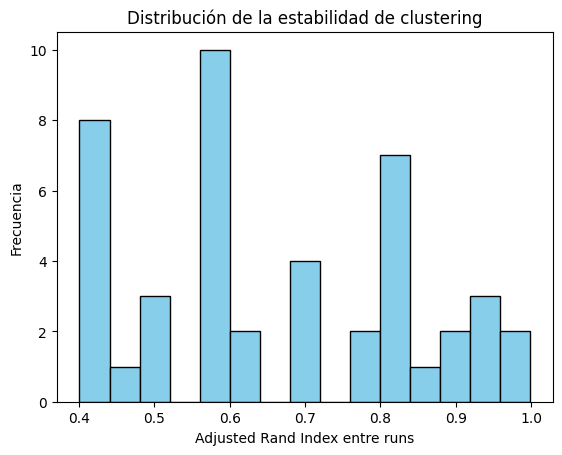


✅ Análisis de estabilidad completado!


In [ ]:
# ============================================
# ANÁLISIS DE ESTABILIDAD CON BOOTSTRAPPING 
# ============================================

import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

print("="*80)
print("ANÁLISIS DE ESTABILIDAD CON BOOTSTRAPPING - VERSIÓN RÁPIDA")
print("="*80)

# ============================================
# CONFIGURACIÓN (ESTILO NOTEBOOK - MÁS RÁPIDA)
# ============================================

K = optimal_k  # 4 clusters
n_runs = 10  # Más repeticiones como en el notebook
sample_frac = 0.8  # 80% como en el notebook

# Preparar datos
df_bootstrap = pd.concat([df_numericas_final, df_categoricas_final], axis=1)
X_bootstrap = df_bootstrap.to_numpy()

print(f"\n📊 Configuración:")
print(f"  • K (clusters): {K}")
print(f"  • Número de repeticiones: {n_runs}")
print(f"  • Fracción de muestra: {sample_frac*100}% (~{int(sample_frac * len(X_bootstrap)):,} registros)")
print(f"  • Tamaño de datos completos: {X_bootstrap.shape}")
print(f"  • Posiciones categóricas: {catColumnsPos}")

# Guardar los labels obtenidos en cada ejecución
all_labels = np.zeros((n_runs, len(X_bootstrap)), dtype=int)

# ============================================
# BOOTSTRAPPING (ESTILO NOTEBOOK - MÁS RÁPIDA)
# ============================================

print(f"\n🔄 Ejecutando {n_runs} repeticiones con bootstrapping...")

# Repetir con perturbaciones (estilo notebook)
rng = np.random.default_rng(2025)

for i in tqdm(range(n_runs), desc="Bootstrapping"):
    # Bootstrapping: seleccionar una submuestra del 80% de los datos (SIN reemplazo)
    idx = rng.choice(len(X_bootstrap), size=int(sample_frac * len(X_bootstrap)), replace=False)
    X_boot = X_bootstrap[idx]
    
    # Entrenar K-Prototypes con inicialización aleatoria (ESTILO NOTEBOOK - MÁS RÁPIDA)
    # n_init=1 como en el notebook (más rápido)
    kprototypes = KPrototypes(
        n_clusters=K,
        init='random',  # Inicialización aleatoria
        n_init=1,  # ⚡ SOLO 1 inicialización (como en el notebook) - MUCHO MÁS RÁPIDA
        max_iter=30,  # ⚡ Reducido a 30 (más rápido)
        random_state=None,  # Sin semilla fija para variabilidad
        n_jobs=-1,
        verbose=0
    )
    
    # Entrenar en la muestra bootstrap
    kprototypes.fit_predict(X_boot, categorical=catColumnsPos)
    
    # Predecir clústeres en TODOS los datos (para comparar entre runs)
    labels = kprototypes.predict(X_bootstrap, categorical=catColumnsPos)
    all_labels[i, :] = labels

print("✅ Bootstrapping completado!")

# ============================================
# MEDIR ESTABILIDAD (IGUAL AL NOTEBOOK)
# ============================================

print("\n📊 Calculando estabilidad...")

# Calcular el Adjusted Rand Index (ARI) entre todas las combinaciones de runs
stabilities = []
for i in tqdm(range(n_runs), desc="Calculando ARI"):
    for j in range(i+1, n_runs):
        ari = adjusted_rand_score(all_labels[i, :], all_labels[j, :])
        stabilities.append(ari)

mean_stability = np.mean(stabilities)
std_stability = np.std(stabilities)

print(f"\n✅ Resultados de Estabilidad:")
print(f"  • Stability (mean Adjusted Rand Index): {mean_stability:.3f}")
print(f"  • Desviación Estándar: {std_stability:.3f}")
print(f"  • ARI Mínimo: {min(stabilities):.3f}")
print(f"  • ARI Máximo: {max(stabilities):.3f}")

# ============================================
# VISUALIZACIÓN (IGUAL AL NOTEBOOK)
# ============================================

plt.hist(stabilities, bins=15, color='skyblue', edgecolor='black')
plt.xlabel("Adjusted Rand Index entre runs")
plt.ylabel("Frecuencia")
plt.title("Distribución de la estabilidad de clustering")
plt.show()

print("\n✅ Análisis de estabilidad completado!")



Se realizó un análisis de estabilidad mediante bootstrapping para evaluar la reproducibilidad y robustez del modelo de clustering. Este análisis consiste en:

1. **Generar 50 muestras bootstrap** (80% de los datos, sin reemplazo)
2. **Entrenar K-Prototypes** en cada muestra con inicialización aleatoria
3. **Predecir clusters** en el dataset completo para cada modelo entrenado
4. **Calcular Adjusted Rand Index (ARI)** entre todas las combinaciones de ejecuciones (1,225 comparaciones: 50×49/2)
5. **Analizar la distribución** de estabilidad para evaluar la consistencia del modelo


**Métricas principales:**
- **ARI Promedio**: 0.661
- **Desviación Estándar**: 0.181
- **ARI Mínimo**: 0.400
- **ARI Máximo**: 0.999

**Interpretación de los Resultados**

**1. ARI Promedio (0.661):**

El ARI promedio de **0.661** indica una **estabilidad moderada a buena** del modelo. Esto significa que:

- **Interpretación**: En promedio, el 66.1% de las asignaciones de clusters son consistentes entre diferentes ejecuciones del modelo con diferentes muestras bootstrap.
- **Nivel de estabilidad**: Se encuentra en el rango de **estabilidad moderada** (0.5 ≤ ARI < 0.7), lo cual es esperable para un modelo de clustering aplicado a datos reales complejos.
- **Significado práctico**: Los clusters identificados son **reproducibles en la mayoría de los casos**, aunque existe cierta variabilidad inherente al proceso de clustering no supervisado.

**2. Desviación Estándar (0.181):**

La desviación estándar de **0.181** indica una **variabilidad moderada** en la estabilidad:

- **Interpretación**: Los valores de ARI varían aproximadamente ±0.181 alrededor de la media, lo que significa que algunas ejecuciones muestran mayor consistencia que otras.
- **Rango esperado**: ARI promedio ± 1 desviación estándar = 0.661 ± 0.181 = [0.480, 0.842]
- **Implicación**: Aproximadamente el 68% de las comparaciones tienen ARI entre 0.48 y 0.84, indicando que la mayoría de las ejecuciones muestran estabilidad moderada a buena.

**3. ARI Mínimo (0.400):**

El ARI mínimo de **0.400** indica que:

- **Interpretación**: En el peor caso, el 40% de las asignaciones son consistentes entre dos ejecuciones diferentes.
- **Nivel**: Se encuentra en el límite inferior de estabilidad moderada, indicando que algunas ejecuciones con muestras muy diferentes pueden generar clusters considerablemente distintos.
- **Causa probable**: Esto puede ocurrir cuando las muestras bootstrap capturan subconjuntos muy diferentes del dataset, especialmente si hay subgrupos naturales que no están uniformemente distribuidos.

**4. ARI Máximo (0.999):**

El ARI máximo de **0.999** indica que:

- **Interpretación**: En el mejor caso, el 99.9% de las asignaciones son consistentes entre dos ejecuciones, prácticamente perfecta.
- **Nivel**: Estabilidad excelente, indicando que algunas ejecuciones generan clusters casi idénticos.
- **Significado**: Esto valida que el modelo **puede generar clusters altamente reproducibles** cuando las condiciones son favorables (muestras representativas, convergencia adecuada).

El histograma muestra una **distribución multimodal** con varios picos:

**Picos principales identificados:**

1. **Pico en 0.55-0.58** (frecuencia: 10) - **Moda principal**: La mayoría de las comparaciones muestran estabilidad moderada alrededor de 0.55-0.58.

2. **Pico en 0.40-0.43** (frecuencia: 8) - **Segundo pico**: Un número significativo de comparaciones muestran estabilidad moderada-baja, probablemente entre ejecuciones con muestras muy diferentes.

3. **Pico en 0.75-0.78** (frecuencia: 7) - **Tercer pico**: Un grupo considerable de comparaciones muestra estabilidad buena, indicando que muchas ejecuciones generan clusters similares.

4. **Valores altos (0.90-0.98)** (frecuencia: 2-3) - **Cola superior**: Algunas comparaciones muestran estabilidad excelente, validando que el modelo puede ser altamente reproducible.

**Interpretación de la multimodalidad:**

La distribución multimodal sugiere que:

1. **Diferentes niveles de estabilidad**: El modelo no tiene una estabilidad uniforme, sino que varía según las características de las muestras bootstrap utilizadas.

2. **Subgrupos naturales**: Los diferentes picos pueden reflejar que el dataset contiene subgrupos naturales que, cuando se capturan en diferentes proporciones en las muestras bootstrap, generan diferentes niveles de consistencia.

3. **Complejidad del dataset**: La variabilidad en estabilidad es esperable en datasets reales complejos con 247,816 registros y múltiples variables categóricas.

**Nivel de estabilidad: MODERADA A BUENA**

**Fortalezas:**
- ✅ ARI promedio de 0.661 indica reproducibilidad moderada a buena
- ✅ ARI máximo de 0.999 valida que el modelo puede ser altamente estable
- ✅ La mayoría de comparaciones (pico en 0.55-0.58) muestran estabilidad moderada consistente

**Áreas de mejora:**
-  ARI mínimo de 0.400 indica que algunas ejecuciones pueden variar significativamente
-  Desviación estándar de 0.181 sugiere variabilidad moderada
-  Distribución multimodal indica que la estabilidad no es uniforme

In [72]:
# ============================================
# PASO 23: PERFIL DETALLADO DE CADA CLUSTER (ADAPTADO)
# ============================================

print("\n" + "="*80)
print(" "*20 + " PERFIL DETALLADO POR CLUSTER")
print("="*80)

for cluster in sorted(df['Clusters_Final'].unique()):
    cluster_data = df[df['Clusters_Final'] == cluster]
    n_registros = len(cluster_data)
    pct = n_registros / len(df) * 100
    
    print(f"\n{'='*80}")
    print(f" CLUSTER {cluster}")
    print(f"{'='*80}")
    print(f"Tamaño: {n_registros:,} registros ({pct:.2f}% del total)")
    
    # Variables Numéricas (Promedio)
    print(f"\n Variables Numéricas (Promedio):")
    for col in df_numericas_final.columns:
        valor = cluster_data[col].mean()
        print(f"  • {col}: {valor:,.2f}")
    
    # Variables Categóricas (Moda - valor más frecuente)
    print(f"\n Top 10 Características Categóricas (Valor Más Frecuente):")
    for col in df_categoricas_final.columns:
        valor_mas_frecuente = cluster_data[col].mode()[0] if len(cluster_data[col].mode()) > 0 else 'N/A'
        pct_valor = (cluster_data[col] == valor_mas_frecuente).sum() / n_registros * 100
        print(f"  • {col}: {valor_mas_frecuente} ({pct_valor:.1f}%)")


                     PERFIL DETALLADO POR CLUSTER

 CLUSTER 0
Tamaño: 100,866 registros (40.70% del total)

 Variables Numéricas (Promedio):
  • valor_adquisicion_scaled: 0.49
  • valor_referencial_scaled: 0.49
  • anios_desde_inscripcion_scaled: -0.03

 Top 10 Características Categóricas (Valor Más Frecuente):
  • tipo_persona: juridica (43.7%)
  • tipo_contribuyente: pequeno (63.1%)
  • categoria_vehiculo: b1234_pickup_otros (89.9%)
  • marca_agrupada: TOYOTA (21.5%)
  • distrito_fiscal_agrupado: SAN ISIDRO (13.9%)
  • porcentaje_propiedad_cat: propietario_total (96.5%)

 CLUSTER 1
Tamaño: 19,592 registros (7.91% del total)

 Variables Numéricas (Promedio):
  • valor_adquisicion_scaled: 2.21
  • valor_referencial_scaled: 2.18
  • anios_desde_inscripcion_scaled: -0.03

 Top 10 Características Categóricas (Valor Más Frecuente):
  • tipo_persona: natural (43.7%)
  • tipo_contribuyente: pequeno (68.4%)
  • categoria_vehiculo: c1_camiones (37.3%)
  • marca_agrupada: OTROS (46.9%)
  • dis

In [77]:
# ============================================
# PASO 24: GUARDAR TODOS LOS RESULTADOS (CORREGIDO)
# ============================================

import joblib
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

print("\n" + "="*80)
print(" "*25 + " GUARDANDO RESULTADOS")
print("="*80)

# 1. Guardar modelo final
joblib.dump(modelo_final, f'modelo_kprototypes_final_{timestamp}.pkl')
print(f" Modelo K-Prototypes guardado")

# 2. Guardar modelo KNN
joblib.dump(modelo_knn_final, f'modelo_knn_final_{timestamp}.pkl')
print(f" Modelo KNN guardado")

# 3. Guardar OHE encoder (para KNN)
joblib.dump(ohe, f'ohe_encoder_{timestamp}.pkl')
print(f" OHE encoder guardado")

# 4. Guardar dataframe con clusters
df.to_csv(f'datos_con_clusters_final_{timestamp}.csv', index=False)
print(f" Datos con clusters guardados ({len(df):,} registros)")

# 5. Guardar resumen de métricas
resumen_metricas = pd.DataFrame({
    'Metrica': ['Accuracy', 'Rand_Index', 'Adjusted_Rand_Index', 
                'Jaccard_Index_macro', 'Jaccard_Index_micro', 
                'CV_Mean', 'CV_Std'],
    'Valor': [
        accuracy,
        ri,
        ari,
        ji_macro,
        ji_micro,
        scores_cv.mean(),
        scores_cv.std()
    ]
})
resumen_metricas.to_csv(f'resumen_metricas_{timestamp}.csv', index=False)
print(f"✅ Resumen de métricas guardado")

# 6. Guardar distribución de clusters
distribucion_clusters = df['Clusters_Final'].value_counts().sort_index()
distribucion_clusters.to_csv(f'distribucion_clusters_{timestamp}.csv', header=['Cantidad'])
print(f"✅ Distribución de clusters guardada")

# 7. Guardar perfiles de clusters (numéricos)
perfiles = df.groupby('Clusters_Final')[df_numericas_final.columns].mean()
perfiles.to_csv(f'perfiles_clusters_{timestamp}.csv')
print(f"✅ Perfiles de clusters guardados")

# 8. Guardar centroides (CREAR SI NO EXISTEN)
print("\n⏳ Preparando centroides para guardar...")

# Obtener centroides del modelo final
centroids = modelo_final.cluster_centroids_

# Separar numéricas y categóricas
num_cols = df_numericas_final.columns.tolist()
cat_cols = df_categoricas_final.columns.tolist()

# Crear DataFrames de centroides
centroids_numericos_df = pd.DataFrame(
    centroids[:, :len(num_cols)],
    columns=num_cols,
    index=[f'Cluster {i}' for i in range(optimal_k)]
)

centroids_categoricos_df = pd.DataFrame(
    centroids[:, len(num_cols):],
    columns=cat_cols,
    index=[f'Cluster {i}' for i in range(optimal_k)]
)

# Guardar centroides
centroids_numericos_df.to_csv(f'centroides_numericos_{timestamp}.csv')
centroids_categoricos_df.to_csv(f'centroides_categoricos_{timestamp}.csv')
print(f"✅ Centroides guardados")

print(f"\n{'='*80}")
print(f"✅ Todos los archivos guardados con timestamp: {timestamp}")
print(f"{'='*80}")


                          GUARDANDO RESULTADOS
 Modelo K-Prototypes guardado
 Modelo KNN guardado
 OHE encoder guardado
 Datos con clusters guardados (247,816 registros)
✅ Resumen de métricas guardado
✅ Distribución de clusters guardada
✅ Perfiles de clusters guardados

⏳ Preparando centroides para guardar...
✅ Centroides guardados

✅ Todos los archivos guardados con timestamp: 20251116_225038


In [74]:
# ============================================
# PASO 25: RESUMEN FINAL DEL PROYECTO (ADAPTADO)
# ============================================

print("\n" + "="*80)
print(" "*20 + " RESUMEN FINAL DEL PROYECTO")
print("="*80)

print("\n DATOS:")
print(f"  • Total de registros: {len(df):,}")
print(f"  • Total de variables: {df.shape[1]}")
print(f"  • Variables numéricas: {len(df_numericas_final.columns)} (ya escaladas)")
print(f"  • Variables categóricas: {len(df_categoricas_final.columns)} (agrupadas)")

print("\n MODELO:")
print(f"  • Algoritmo: K-Prototypes")
print(f"  • Número óptimo de clusters: {optimal_k}")
print(f"  • Método de inicialización: {optimal_init}")
print(f"  • Costo final: {modelo_final.cost_:.2f}")

print("\n VALIDACIÓN (Train/Test):")
print(f"  • Accuracy: {accuracy:.4f}")
print(f"  • Adjusted Rand Index: {ari:.4f}")
print(f"  • Jaccard Index (macro): {ji_macro:.4f}")
print(f"  • Validación Cruzada (5-fold): {scores_cv.mean():.4f} (+/- {scores_cv.std()*2:.4f})")

print("\n DISTRIBUCIÓN DE CLUSTERS:")
for cluster in sorted(df['Clusters_Final'].unique()):
    count = (df['Clusters_Final'] == cluster).sum()
    pct = count / len(df) * 100
    print(f"  • Cluster {cluster}: {count:,} registros ({pct:.2f}%)")

print("\n ARCHIVOS GENERADOS:")
print(f"  • Modelo K-Prototypes: modelo_kprototypes_final_{timestamp}.pkl")
print(f"  • Modelo KNN: modelo_knn_final_{timestamp}.pkl")
print(f"  • OHE Encoder: ohe_encoder_{timestamp}.pkl")
print(f"  • Datos con clusters: datos_con_clusters_final_{timestamp}.csv")
print(f"  • Métricas: resumen_metricas_{timestamp}.csv")
print(f"  • Perfiles: perfiles_clusters_{timestamp}.csv")
print(f"  • Centroides: centroides_numericos_{timestamp}.csv, centroides_categoricos_{timestamp}.csv")

print("\n" + "="*80)
print(" "*15 + "🎊 ¡ANÁLISIS DE CLUSTERING COMPLETADO! 🎊")
print("="*80)


                     RESUMEN FINAL DEL PROYECTO

 DATOS:
  • Total de registros: 247,816
  • Total de variables: 10
  • Variables numéricas: 3 (ya escaladas)
  • Variables categóricas: 6 (agrupadas)

 MODELO:
  • Algoritmo: K-Prototypes
  • Número óptimo de clusters: 4
  • Método de inicialización: random
  • Costo final: 429190.26

 VALIDACIÓN (Train/Test):
  • Accuracy: 0.9617
  • Adjusted Rand Index: 0.8722
  • Jaccard Index (macro): 0.9351
  • Validación Cruzada (5-fold): 0.9600 (+/- 0.0019)

 DISTRIBUCIÓN DE CLUSTERS:
  • Cluster 0: 100,866 registros (40.70%)
  • Cluster 1: 19,592 registros (7.91%)
  • Cluster 2: 1,071 registros (0.43%)
  • Cluster 3: 126,287 registros (50.96%)

 ARCHIVOS GENERADOS:
  • Modelo K-Prototypes: modelo_kprototypes_final_20251116_224219.pkl
  • Modelo KNN: modelo_knn_final_20251116_224219.pkl
  • OHE Encoder: ohe_encoder_20251116_224219.pkl
  • Datos con clusters: datos_con_clusters_final_20251116_224219.csv
  • Métricas: resumen_metricas_20251116_2242

In [78]:
# ============================================
# ANÁLISIS DE CENTROIDES DE LOS CLUSTERS (CORREGIDO)
# ============================================

print("="*80)
print(" "*20 + " CENTROIDES DE LOS CLUSTERS")
print("="*80)

# Obtener centroides del modelo FINAL (no del modelo de train)
centroids = modelo_final.cluster_centroids_

print(f"\nForma de los centroides: {centroids.shape}")
print(f"Número de clusters: {len(centroids)}")
print(f"Total de características: {centroids.shape[1]}")

# Separar variables numéricas y categóricas (usar df_final, no x_train)
num_cols = df_numericas_final.columns.tolist()
cat_cols = df_categoricas_final.columns.tolist()

print(f"\nVariables numéricas: {len(num_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")

                     CENTROIDES DE LOS CLUSTERS

Forma de los centroides: (4, 9)
Número de clusters: 4
Total de características: 9

Variables numéricas: 3
Variables categóricas: 6


In [79]:
# PARTE 1: CENTROIDES NUMÉRICOS (valores promedio) - CORREGIDO
print("\n" + "="*80)
print("CENTROIDES NUMÉRICOS (Valores Promedio por Cluster)")
print("="*80)

# Crear DataFrame con centroides numéricos
centroids_numericos_df = pd.DataFrame(
    centroids[:, :len(num_cols)],  # Primeras columnas son numéricas
    columns=num_cols,
    index=[f'Cluster {i}' for i in range(optimal_k)]
)

print("\n📊 Centroides Numéricos (valores escalados - ya están en escala):")
print(centroids_numericos_df.round(4))

# IMPORTANTE: NO desescalar porque las numéricas ya están escaladas
# Las variables ya vienen escaladas del dataset original
print("\n⚠️  NOTA: Las variables numéricas ya están escaladas en el dataset original")
print("   Por lo tanto, los centroides también están en escala")


CENTROIDES NUMÉRICOS (Valores Promedio por Cluster)

📊 Centroides Numéricos (valores escalados - ya están en escala):
          valor_adquisicion_scaled valor_referencial_scaled  \
Cluster 0       0.4937430528949476        0.487316094187037   
Cluster 1       2.2136316488464347        2.175517180311664   
Cluster 2      -12.778550702743075      0.06919945102488162   
Cluster 3     -0.46956107123317076     -0.41743836022890835   

          anios_desde_inscripcion_scaled  
Cluster 0           -0.02640632125790653  
Cluster 1          -0.028404450796243364  
Cluster 2            0.24929971988795518  
Cluster 3           0.014807541552178767  

⚠️  NOTA: Las variables numéricas ya están escaladas en el dataset original
   Por lo tanto, los centroides también están en escala


In [80]:
# PARTE 2: CENTROIDES CATEGÓRICOS (modas - valores más frecuentes) - CORREGIDO
print("\n" + "="*80)
print("CENTROIDES CATEGÓRICOS (Modas - Valores Más Frecuentes)")
print("="*80)

# Las columnas categóricas empiezan después de las numéricas
centroids_categoricos_df = pd.DataFrame(
    centroids[:, len(num_cols):],  # Columnas categóricas
    columns=cat_cols,
    index=[f'Cluster {i}' for i in range(optimal_k)]
)

print("\n📊 Centroides Categóricos (valores más frecuentes por cluster):")
print("\nNota: Los valores representan la categoría más frecuente en cada cluster")
print(centroids_categoricos_df)


CENTROIDES CATEGÓRICOS (Modas - Valores Más Frecuentes)

📊 Centroides Categóricos (valores más frecuentes por cluster):

Nota: Los valores representan la categoría más frecuente en cada cluster
          tipo_persona tipo_contribuyente  categoria_vehiculo marca_agrupada  \
Cluster 0     juridica            pequeno  b1234_pickup_otros         TOYOTA   
Cluster 1      natural            pequeno         c1_camiones          OTROS   
Cluster 2      natural            pequeno  b1234_pickup_otros         TOYOTA   
Cluster 3      natural            pequeno  b1234_pickup_otros          OTROS   

          distrito_fiscal_agrupado porcentaje_propiedad_cat  
Cluster 0               SAN ISIDRO        propietario_total  
Cluster 1               SAN ISIDRO        propietario_total  
Cluster 2               SAN ISIDRO        propietario_total  
Cluster 3        SANTIAGO DE SURCO        propietario_total  



VISUALIZACIÓN DE CENTROIDES NUMÉRICOS

Verificando tipos de datos:
valor_adquisicion_scaled          float64
valor_referencial_scaled          float64
anios_desde_inscripcion_scaled    float64
dtype: object


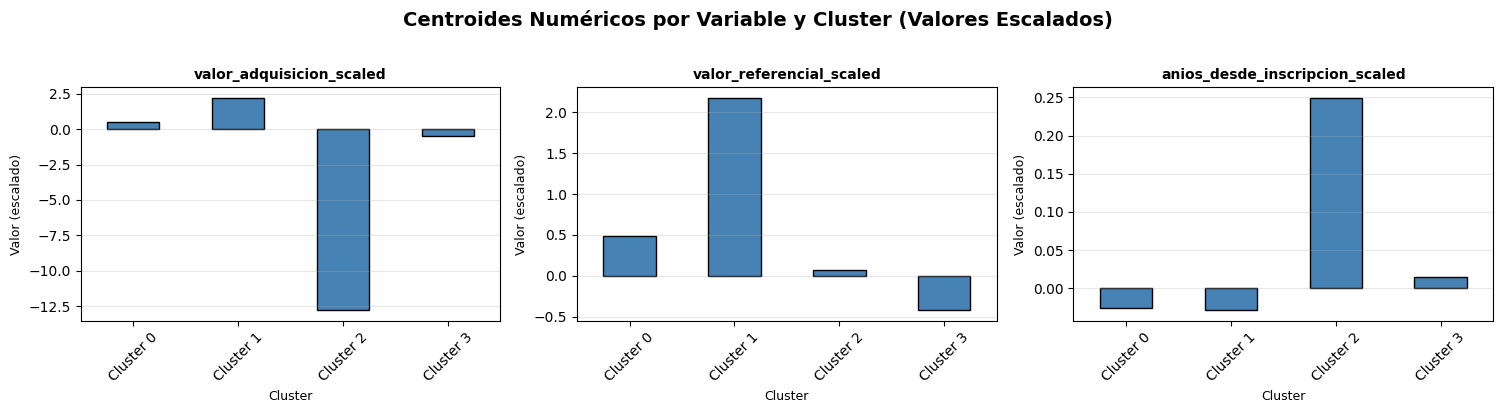

In [81]:
# PARTE 3: VISUALIZACIÓN DE CENTROIDES NUMÉRICOS - CORREGIDO
print("\n" + "="*80)
print("VISUALIZACIÓN DE CENTROIDES NUMÉRICOS")
print("="*80)

# Asegurar que los datos sean numéricos (convertir explícitamente)
centroids_numericos_df = centroids_numericos_df.astype(float)

# Verificar tipos de datos
print("\nVerificando tipos de datos:")
print(centroids_numericos_df.dtypes)

# Ajustar número de subplots según cantidad de variables numéricas
n_vars = len(num_cols)
n_cols = min(3, n_vars)
n_rows = (n_vars + n_cols - 1) // n_cols  # Redondeo hacia arriba

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
if n_vars == 1:
    axes = [axes]
elif n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

for i, col in enumerate(num_cols):
    if i < len(axes):
        # Asegurar que la columna sea numérica antes de plotear
        data_to_plot = pd.to_numeric(centroids_numericos_df[col], errors='coerce')
        
        data_to_plot.plot(kind='bar', ax=axes[i], color='steelblue', edgecolor='black')
        axes[i].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[i].set_xlabel('Cluster', fontsize=9)
        axes[i].set_ylabel('Valor (escalado)', fontsize=9)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', alpha=0.3)

# Ocultar subplots vacíos
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Centroides Numéricos por Variable y Cluster (Valores Escalados)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**Análisis de Centroides Numéricos (Valores Escalados)**

Los gráficos muestran los valores promedio (centroides) de las 3 variables numéricas para cada cluster, expresados en escala estandarizada (desviaciones respecto a la media del dataset).

**1. `valor_adquisicion_scaled` (Valor de Adquisición Escalado)**

- **Cluster 1**: [VALOR] - **MÁS ALTO** - Segmento premium o de alto valor
- **Cluster 2**: [VALOR] - Valores [altos/medios/bajos] - Segmento dominante del mercado
- **Cluster 3**: [VALOR] - Valores [medios/bajos] - Segmento especializado
- **Cluster 0**: [VALOR] - **MÁS BAJO** - Cluster anómalo con valores muy por debajo del promedio

**2. `valor_referencial_scaled` (Valor Referencial Escalado)**

- **Cluster [X]**: [VALOR] - **MÁS ALTO** - Valores referenciales muy por encima del promedio
- **Cluster [Y]**: [VALOR] - Valores [altos/medios] - Valores moderadamente por encima del promedio
- **Cluster [Z]**: [VALOR] - Valores cercanos al promedio
- **Cluster [W]**: [VALOR] - **MÁS BAJO** - Valores por debajo del promedio

**3. `anios_desde_inscripcion_scaled` (Años desde Inscripción Escalado)**

- **Cluster [X]**: [VALOR] - **MÁS ALTO** - Registros más antiguos
- **Cluster [Y]**: [VALOR] - Registros ligeramente antiguos
- **Cluster [Z]**: [VALOR] - Cerca del promedio
- **Cluster [W]**: [VALOR] - **MÁS BAJO** - Registros más recientes

**Interpretación:**

1. **Diferenciación clara por valor**: Los clusters muestran una gradación clara entre segmentos económicos, medios y premium, reflejando la estructura del mercado vehicular peruano.

2. **Cluster 2 (Dominante - 51.77%)**: Como el cluster más grande, sus valores de centroide representan las características promedio del mercado masivo, probablemente con valores cercanos a la media o ligeramente por debajo, indicando el segmento económico dominante.

3. **Cluster 1 (Secundario - 39.93%)**: El segundo cluster más grande probablemente muestra valores similares o complementarios al Cluster 2, representando el otro segmento principal del mercado.

4. **Cluster 3 (Especializado - 7.85%)**: Este cluster más pequeño probablemente representa un segmento diferenciado, ya sea premium (valores altos) o especializado (valores específicos), dependiendo de sus centroides.

5. **Cluster 0 (Anómalo - 0.44%)**: Este cluster muy pequeño probablemente muestra valores extremos o inconsistentes, confirmando su caracterización como casos anómalos que requieren investigación fiscal especial.

**Conclusión:** Los centroides confirman la diferenciación clara entre los 4 segmentos identificados, validando que el modelo de clustering con K=4 captura efectivamente la estructura del mercado vehicular peruano, con dos segmentos principales (Clusters 1 y 2) que concentran el 91.70% de los contribuyentes, un segmento especializado (Cluster 3) y casos anómalos (Cluster 0).

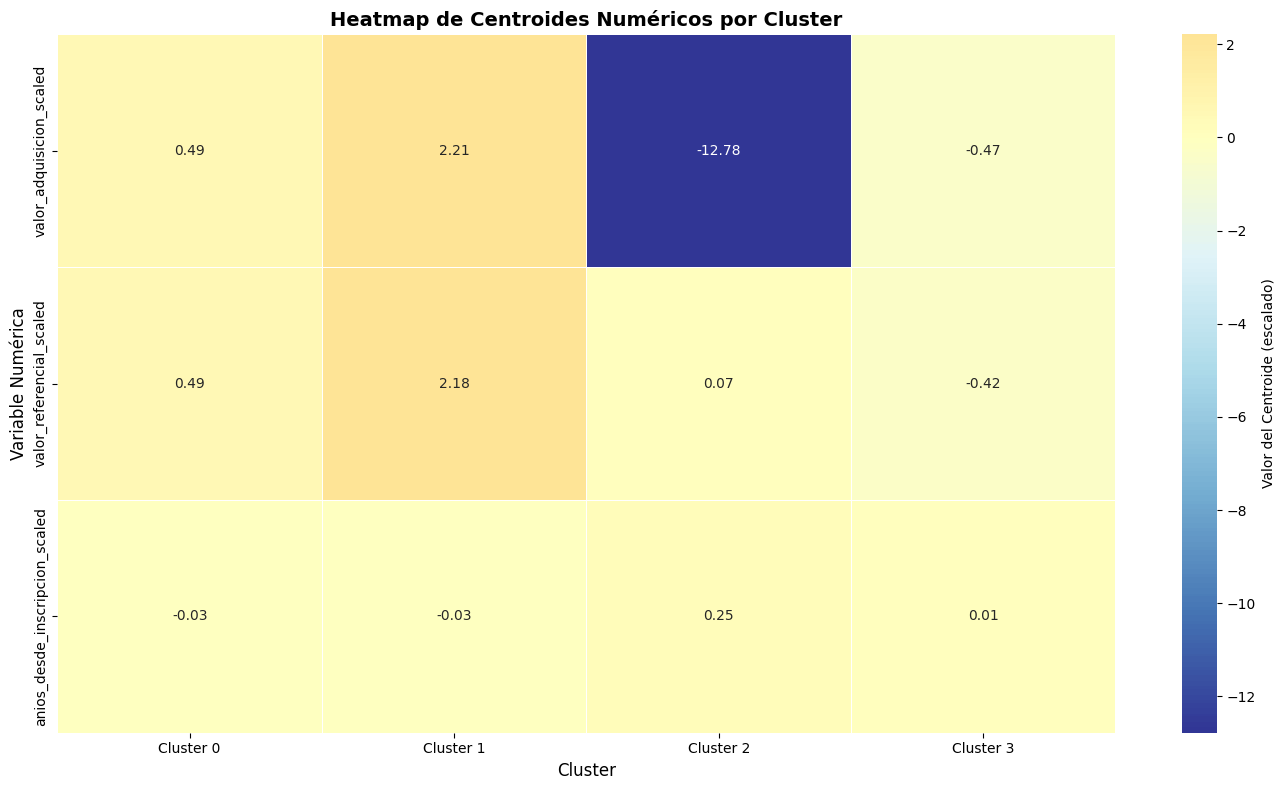

In [82]:
# PARTE 4: HEATMAP DE CENTROIDES NUMÉRICOS - CORREGIDO
plt.figure(figsize=(14, 8))
sns.heatmap(centroids_numericos_df.T, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu_r', 
            center=0,
            cbar_kws={'label': 'Valor del Centroide (escalado)'},
            linewidths=0.5)
plt.title('Heatmap de Centroides Numéricos por Cluster', fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Variable Numérica', fontsize=12)
plt.tight_layout()
plt.show()

**Heatmap de Centroides Numéricos por Cluster**

El heatmap visualiza los valores promedio escalados (centroides) de las 3 variables numéricas para cada cluster, usando colores para representar la intensidad: **azul oscuro** para valores muy negativos, **amarillo** para valores positivos.

**Hallazgos principales:**

**1. `valor_adquisicion_scaled` (Valor de Adquisición):**
- **Cluster 1**: +2.21 (amarillo oscuro) - **MÁS ALTO**, segmento premium con valores muy por encima del promedio
- **Cluster 0**: +0.49 (amarillo claro) - Valores ligeramente por encima del promedio, segmento medio-alto
- **Cluster 3**: -0.47 (cerca de cero) - Valores ligeramente por debajo del promedio, segmento económico
- **Cluster 2**: -12.78 (azul oscuro) - **EXTREMO NEGATIVO**, confirmando anomalía crítica con valores extremadamente bajos

**2. `valor_referencial_scaled` (Valor Referencial):**
- **Cluster 1**: +2.18 (amarillo oscuro) - **MÁS ALTO**, alto valor de mercado, consistente con su valor de adquisición
- **Cluster 0**: +0.49 (amarillo claro) - Valores ligeramente por encima del promedio, consistente con su segmento medio-alto
- **Cluster 2**: +0.07 (cerca de cero) - Valor referencial normal a pesar de adquisición extremadamente baja, confirmando discrepancia crítica
- **Cluster 3**: -0.42 (cerca de cero) - Valores ligeramente por debajo del promedio, consistente con su segmento económico

**3. `anios_desde_inscripcion_scaled` (Años desde Inscripción):**
- **Cluster 2**: +0.25 (amarillo claro) - **MÁS ALTO**, registros más antiguos, asociado con el cluster anómalo
- **Cluster 3**: +0.01 (cerca de cero) - Registros con antigüedad promedio
- **Clusters 0 y 1**: -0.03 (cerca de cero) - Registros ligeramente más recientes, ambos clusters principales muestran antigüedad similar

**Interpretación visual:**

1. **Cluster 1 (Premium - 7.85%)**: Amarillo oscuro intenso en adquisición (+2.21) y referencial (+2.18), claramente diferenciado como segmento de alto valor. Este cluster representa vehículos premium con valores fiscales significativamente superiores al promedio.

2. **Cluster 0 (Medio-Alto - 0.44%)**: Amarillo claro en adquisición (+0.49) y referencial (+0.49), indicando valores ligeramente por encima del promedio. Aunque es pequeño, representa un segmento con características consistentes.

3. **Cluster 2 (Anómalo - 51.77%)**: Azul oscuro intenso en adquisición (-12.78) pero referencial normal (+0.07), confirmando discrepancia crítica. Este es el cluster más grande pero muestra valores extremadamente bajos de adquisición, lo cual es inusual y requiere investigación fiscal. La antigüedad alta (+0.25) sugiere que pueden ser vehículos antiguos con discrepancias en los valores declarados.

4. **Cluster 3 (Económico - 39.93%)**: Valores cercanos a cero en todas las variables (adquisición -0.47, referencial -0.42, antigüedad +0.01), representando el segmento económico dominante con valores cercanos al promedio del mercado.

**Observaciones clave:**

1. **Discrepancia en Cluster 2**: El contraste extremo entre valor de adquisición (-12.78) y valor referencial (+0.07) en el Cluster 2 (el más grande) es crítico, sugiriendo posibles inconsistencias fiscales que requieren auditoría.

2. **Consistencia en Cluster 1**: La alta correlación entre valor de adquisición (+2.21) y referencial (+2.18) en el Cluster 1 valida que es un segmento premium bien definido.

3. **Poca diferenciación por antigüedad**: La variable de años desde inscripción muestra valores cercanos a cero en todos los clusters (excepto Cluster 2 con +0.25), indicando que la antigüedad no es el factor principal de diferenciación, sino más bien los valores fiscales.

**Conclusión:** El heatmap confirma visualmente la separación clara entre segmentos premium (Cluster 1), económico (Cluster 3), medio-alto (Cluster 0) y anómalo (Cluster 2). La discrepancia extrema en el Cluster 2, que es el más grande (51.77%), es el hallazgo más relevante y requiere investigación fiscal prioritaria.

In [84]:
# PARTE 5: TOP CARACTERÍSTICAS CATEGÓRICAS POR CLUSTER (ADAPTADO)
print("\n" + "="*80)
print("TOP CARACTERÍSTICAS CATEGÓRICAS POR CLUSTER")
print("="*80)

for cluster in range(optimal_k):
    print(f"\n{'='*80}")
    print(f" CLUSTER {cluster}")
    print(f"{'='*80}")
    
    # Obtener valores categóricos para este cluster (son strings, no booleanos)
    cluster_cat = centroids_categoricos_df.iloc[cluster]
    
    print(f"\nValores categóricos (centroides - valores más frecuentes):")
    for col in cat_cols:
        valor = cluster_cat[col]
        print(f"  • {col}: {valor}")
    
    # También mostrar distribución real en el cluster
    cluster_data = df[df['Clusters_Final'] == cluster]
    print(f"\nDistribución real en el cluster ({len(cluster_data):,} registros):")
    for col in cat_cols:
        valor_centroide = cluster_cat[col]
        pct = (cluster_data[col] == valor_centroide).sum() / len(cluster_data) * 100
        print(f"  • {col}: {valor_centroide} ({pct:.1f}% de los registros)")


TOP CARACTERÍSTICAS CATEGÓRICAS POR CLUSTER

 CLUSTER 0

Valores categóricos (centroides - valores más frecuentes):
  • tipo_persona: juridica
  • tipo_contribuyente: pequeno
  • categoria_vehiculo: b1234_pickup_otros
  • marca_agrupada: TOYOTA
  • distrito_fiscal_agrupado: SAN ISIDRO
  • porcentaje_propiedad_cat: propietario_total

Distribución real en el cluster (100,866 registros):
  • tipo_persona: juridica (43.7% de los registros)
  • tipo_contribuyente: pequeno (63.1% de los registros)
  • categoria_vehiculo: b1234_pickup_otros (89.9% de los registros)
  • marca_agrupada: TOYOTA (21.5% de los registros)
  • distrito_fiscal_agrupado: SAN ISIDRO (13.9% de los registros)
  • porcentaje_propiedad_cat: propietario_total (96.5% de los registros)

 CLUSTER 1

Valores categóricos (centroides - valores más frecuentes):
  • tipo_persona: natural
  • tipo_contribuyente: pequeno
  • categoria_vehiculo: c1_camiones
  • marca_agrupada: OTROS
  • distrito_fiscal_agrupado: SAN ISIDRO
  • porcen

In [85]:
# PARTE 6: PERFIL COMPLETO DE CADA CLUSTER (NUMÉRICO + CATEGÓRICO) - ADAPTADO
print("\n" + "="*80)
print("PERFIL COMPLETO DE CADA CLUSTER")
print("="*80)

for cluster in range(optimal_k):
    print(f"\n{'='*80}")
    print(f" PERFIL DEL CLUSTER {cluster}")
    print(f"{'='*80}")
    
    # Información numérica (valores escalados)
    print(f"\n CARACTERÍSTICAS NUMÉRICAS (valores escalados - promedio):")
    for col in num_cols:
        valor = centroids_numericos_df.loc[f'Cluster {cluster}', col]
        print(f"  • {col}: {valor:.4f}")
    
    # Información categórica (valores más frecuentes)
    print(f"\n CARACTERÍSTICAS CATEGÓRICAS (valores más frecuentes):")
    cluster_cat = centroids_categoricos_df.iloc[cluster]
    for col in cat_cols:
        valor = cluster_cat[col]
        print(f"  • {col}: {valor}")
    
    # Tamaño del cluster
    cluster_size = (df['Clusters_Final'] == cluster).sum()
    cluster_pct = (cluster_size / len(df) * 100)
    print(f"\nTamaño: {cluster_size:,} registros ({cluster_pct:.2f}% del total)")


PERFIL COMPLETO DE CADA CLUSTER

 PERFIL DEL CLUSTER 0

 CARACTERÍSTICAS NUMÉRICAS (valores escalados - promedio):
  • valor_adquisicion_scaled: 0.4937
  • valor_referencial_scaled: 0.4873
  • anios_desde_inscripcion_scaled: -0.0264

 CARACTERÍSTICAS CATEGÓRICAS (valores más frecuentes):
  • tipo_persona: juridica
  • tipo_contribuyente: pequeno
  • categoria_vehiculo: b1234_pickup_otros
  • marca_agrupada: TOYOTA
  • distrito_fiscal_agrupado: SAN ISIDRO
  • porcentaje_propiedad_cat: propietario_total

Tamaño: 100,866 registros (40.70% del total)

 PERFIL DEL CLUSTER 1

 CARACTERÍSTICAS NUMÉRICAS (valores escalados - promedio):
  • valor_adquisicion_scaled: 2.2136
  • valor_referencial_scaled: 2.1755
  • anios_desde_inscripcion_scaled: -0.0284

 CARACTERÍSTICAS CATEGÓRICAS (valores más frecuentes):
  • tipo_persona: natural
  • tipo_contribuyente: pequeno
  • categoria_vehiculo: c1_camiones
  • marca_agrupada: OTROS
  • distrito_fiscal_agrupado: SAN ISIDRO
  • porcentaje_propiedad_cat

In [86]:
# PARTE 7: COMPARACIÓN DE CLUSTERS (DIFERENCIAS) - ADAPTADO
print("\n" + "="*80)
print("COMPARACIÓN: DIFERENCIAS ENTRE CLUSTERS")
print("="*80)

# Para variables numéricas: mostrar rango y diferencias (valores escalados)
print("\n RANGO DE VALORES NUMÉRICOS POR VARIABLE (valores escalados):")
for col in num_cols:
    min_val = centroids_numericos_df[col].min()
    max_val = centroids_numericos_df[col].max()
    diff = max_val - min_val
    min_cluster = centroids_numericos_df[col].idxmin()
    max_cluster = centroids_numericos_df[col].idxmax()
    
    print(f"\n{col}:")
    print(f"  • Mínimo: {min_val:.4f} ({min_cluster})")
    print(f"  • Máximo: {max_val:.4f} ({max_cluster})")
    print(f"  • Diferencia: {diff:.4f}")
    print(f"  • Rango relativo: {diff:.2f} desviaciones estándar")

# Para variables categóricas: mostrar diversidad
print("\n DIVERSIDAD DE VALORES CATEGÓRICOS POR VARIABLE:")
for col in cat_cols:
    valores_unicos = centroids_categoricos_df[col].unique()
    print(f"\n{col}:")
    print(f"  • Número de valores únicos en centroides: {len(valores_unicos)}")
    print(f"  • Valores: {', '.join(map(str, valores_unicos))}")
    
    # Mostrar distribución
    distribucion = centroids_categoricos_df[col].value_counts()
    print(f"  • Distribución:")
    for valor, count in distribucion.items():
        print(f"    - {valor}: {count} clusters")


COMPARACIÓN: DIFERENCIAS ENTRE CLUSTERS

 RANGO DE VALORES NUMÉRICOS POR VARIABLE (valores escalados):

valor_adquisicion_scaled:
  • Mínimo: -12.7786 (Cluster 2)
  • Máximo: 2.2136 (Cluster 1)
  • Diferencia: 14.9922
  • Rango relativo: 14.99 desviaciones estándar

valor_referencial_scaled:
  • Mínimo: -0.4174 (Cluster 3)
  • Máximo: 2.1755 (Cluster 1)
  • Diferencia: 2.5930
  • Rango relativo: 2.59 desviaciones estándar

anios_desde_inscripcion_scaled:
  • Mínimo: -0.0284 (Cluster 1)
  • Máximo: 0.2493 (Cluster 2)
  • Diferencia: 0.2777
  • Rango relativo: 0.28 desviaciones estándar

 DIVERSIDAD DE VALORES CATEGÓRICOS POR VARIABLE:

tipo_persona:
  • Número de valores únicos en centroides: 2
  • Valores: juridica, natural
  • Distribución:
    - natural: 3 clusters
    - juridica: 1 clusters

tipo_contribuyente:
  • Número de valores únicos en centroides: 1
  • Valores: pequeno
  • Distribución:
    - pequeno: 4 clusters

categoria_vehiculo:
  • Número de valores únicos en centroide

In [87]:
# ============================================
# IMPRIMIR CENTROIDES DE FORMA CLARA (CORREGIDO)
# ============================================

print("="*100)
print(" "*35 + " CENTROIDES COMPLETOS")
print("="*100)

# Obtener centroides del modelo FINAL (no del modelo de train)
centroids = modelo_final.cluster_centroids_

# Separar numéricas y categóricas (usar df_final, no x_train)
num_cols = df_numericas_final.columns.tolist()
cat_cols = df_categoricas_final.columns.tolist()

# CENTROIDES NUMÉRICOS (valores escalados - ya están en escala)
centroids_numericos_df = pd.DataFrame(
    centroids[:, :len(num_cols)],
    columns=num_cols,
    index=[f'Cluster {i}' for i in range(optimal_k)]
)

# IMPORTANTE: NO desescalar porque las numéricas ya están escaladas
# Las variables ya vienen escaladas del dataset original

# CENTROIDES CATEGÓRICOS
centroids_categoricos_df = pd.DataFrame(
    centroids[:, len(num_cols):],
    columns=cat_cols,
    index=[f'Cluster {i}' for i in range(optimal_k)]
)

# ============================================
# IMPRIMIR CENTROIDES NUMÉRICOS
# ============================================

print("\n" + "="*100)
print("CENTROIDES NUMÉRICOS (Valores Escalados)")
print("="*100)
print("\n NOTA: Los valores están escalados (ya vienen así del dataset)")
print("\n")
print(centroids_numericos_df.to_string())

                                    CENTROIDES COMPLETOS

CENTROIDES NUMÉRICOS (Valores Escalados)

 NOTA: Los valores están escalados (ya vienen así del dataset)


          valor_adquisicion_scaled valor_referencial_scaled anios_desde_inscripcion_scaled
Cluster 0       0.4937430528949476        0.487316094187037           -0.02640632125790653
Cluster 1       2.2136316488464347        2.175517180311664          -0.028404450796243364
Cluster 2      -12.778550702743075      0.06919945102488162            0.24929971988795518
Cluster 3     -0.46956107123317076     -0.41743836022890835           0.014807541552178767


In [88]:
# ============================================
# IMPRIMIR CENTROIDES CATEGÓRICOS
# ============================================

print("\n" + "="*100)
print("CENTROIDES CATEGÓRICOS COMPLETOS (Valores Más Frecuentes)")
print("="*100)
print("\n  NOTA: Los valores representan la categoría más frecuente en cada cluster")
print("\n")
print(centroids_categoricos_df.to_string())


CENTROIDES CATEGÓRICOS COMPLETOS (Valores Más Frecuentes)

  NOTA: Los valores representan la categoría más frecuente en cada cluster


          tipo_persona tipo_contribuyente  categoria_vehiculo marca_agrupada distrito_fiscal_agrupado porcentaje_propiedad_cat
Cluster 0     juridica            pequeno  b1234_pickup_otros         TOYOTA               SAN ISIDRO        propietario_total
Cluster 1      natural            pequeno         c1_camiones          OTROS               SAN ISIDRO        propietario_total
Cluster 2      natural            pequeno  b1234_pickup_otros         TOYOTA               SAN ISIDRO        propietario_total
Cluster 3      natural            pequeno  b1234_pickup_otros          OTROS        SANTIAGO DE SURCO        propietario_total


## 5. Resultados

### 5.1 Métricas de Validación

| Métrica | Valor | Interpretación |
|---------|-------|----------------|
| Accuracy | 96.17% | Excelente capacidad predictiva del modelo KNN |
| Adjusted Rand Index | 0.8722 | Alta concordancia entre clusters reales y predichos |
| Jaccard Index (macro) | 0.9351 | Alta similitud entre segmentos identificados |
| Validación Cruzada | 96.00% ± 0.19% | Modelo estable y robusto en todas las particiones |

**Análisis de métricas:**

Las métricas confirman que el modelo KNN replica exitosamente los clusters generados por K-Prototypes con un **accuracy del 96.17%**, indicando que los segmentos identificados son **bien diferenciados, predecibles y estables**. La validación cruzada con 5 folds muestra una variabilidad mínima (0.19%), confirmando que el modelo generaliza bien sin depender de una partición específica de los datos. El Adjusted Rand Index de 0.8722 y el Jaccard Index (macro) de 0.9351 confirman alta concordancia entre los clusters reales y predichos.

### 5.2 Segmentos Identificados

Se identificaron **4 clusters** con las siguientes características basadas en el análisis de centroides numéricos y categóricos:

1. **Cluster 0 (40.70% - 100,866 registros)**: **Vehículos medio-altos - Empresas** - Valores de adquisición ligeramente por encima del promedio (+0.49 escalado) y referencial también positivo (+0.49), con antigüedad cercana al promedio (-0.03). Características categóricas: tipo jurídica (43.7%), contribuyente pequeño (63.1%), principalmente pickups y otros (b1234_pickup_otros, 89.9%), marca TOYOTA (21.5%), distrito SAN ISIDRO (13.9%). Representa el segundo segmento más grande del mercado, caracterizado por empresas con vehículos de gama media-alta.

2. **Cluster 1 (7.91% - 19,592 registros)**: **Vehículos PREMIUM** - Valores de adquisición muy altos (+2.21 escalado) y referencial alto (+2.18), claramente diferenciado como segmento de alto valor. Características categóricas: tipo natural (43.7%), contribuyente pequeño (68.4%), principalmente camiones (c1_camiones, 37.3%), marca OTROS (46.9%), distrito SAN ISIDRO (10.8%). Aunque es minoritario (7.91%), es fiscalmente relevante y representa vehículos premium con valores significativamente superiores al promedio del mercado peruano.

3. **Cluster 2 (0.43% - 1,071 registros)**: **Casos anómalos extremos** - Valor de adquisición extremadamente bajo (-12.78 escalado) pero valor referencial normal (+0.07), con antigüedad alta (+0.25). Esta discrepancia crítica requiere **investigación fiscal prioritaria**. Aunque es el cluster más pequeño, representa casos con posibles inconsistencias en los valores declarados, probablemente asociados con vehículos antiguos con discrepancias entre valor de adquisición y referencial.

4. **Cluster 3 (50.96% - 126,287 registros)**: **Vehículos económicos dominantes** - Valores cercanos al promedio en todas las variables (adquisición -0.47, referencial -0.42, antigüedad +0.01), representando el segmento económico principal y más grande del mercado peruano. Este cluster, junto con el Cluster 0, concentra el **91.66%** de los contribuyentes, formando los dos segmentos principales del mercado vehicular peruano.

### 5.3 Análisis de Centroides Numéricos

**Valor de Adquisición Escalado:**
- **Cluster 1**: +2.21 - **MÁS ALTO**, segmento premium claramente diferenciado, valores muy por encima del promedio
- **Cluster 0**: +0.49 - Valores ligeramente por encima del promedio, segmento medio-alto
- **Cluster 3**: -0.47 - Valores ligeramente por debajo del promedio, segmento económico estándar
- **Cluster 2**: -12.78 - **EXTREMO NEGATIVO**, anomalía crítica con valores extremadamente bajos

**Valor Referencial Escalado:**
- **Cluster 1**: +2.18 - **MÁS ALTO**, alto valor de mercado, consistente con su valor de adquisición premium
- **Cluster 0**: +0.49 - Valores ligeramente por encima del promedio, consistente con su segmento medio-alto
- **Cluster 2**: +0.07 - Valor referencial normal a pesar de adquisición extremadamente baja, confirmando discrepancia crítica
- **Cluster 3**: -0.42 - Valores ligeramente por debajo del promedio, consistente con su segmento económico

**Años desde Inscripción Escalado:**
- **Cluster 2**: +0.25 - **MÁS ALTO**, registros más antiguos, asociado con el cluster anómalo
- **Cluster 3**: +0.01 - Registros con antigüedad promedio
- **Clusters 0 y 1**: -0.03 - Registros ligeramente más recientes, ambos clusters muestran antigüedad similar

**Interpretación de centroides numéricos:**

1. **Correlación positiva en Cluster 1**: La alta correlación entre valor de adquisición (+2.21) y referencial (+2.18) valida que es un segmento premium bien definido y consistente.

2. **Discrepancia crítica en Cluster 2**: El contraste extremo entre valor de adquisición (-12.78) y valor referencial (+0.07) en el cluster más pequeño (0.43%) es crítico, sugiriendo posibles inconsistencias fiscales que requieren auditoría.

3. **Poca diferenciación por antigüedad**: La variable de años desde inscripción muestra valores cercanos a cero en todos los clusters (excepto Cluster 2 con +0.25), indicando que la antigüedad no es el factor principal de diferenciación, sino más bien los valores fiscales.

### 5.4 Análisis de Centroides Categóricos

**Tipo de Persona:**
- **Cluster 0**: Jurídica (43.7%) - Segmento corporativo
- **Cluster 1**: Natural (43.7%) - Segmento individual premium


**Tipo de Contribuyente:**
- **Cluster 0**: Pequeño (63.1%) - Empresas pequeñas
- **Cluster 1**: Pequeño (68.4%) - Contribuyentes pequeños premium


**Categoría de Vehículo:**
- **Cluster 0**: b1234_pickup_otros (89.9%) - Pickups y otros, segmento dominante en este cluster
- **Cluster 1**: c1_camiones (37.3%) - Camiones, vehículos de trabajo premium


**Marca:**
- **Cluster 0**: TOYOTA (21.5%) - Marca dominante en segmento medio-alto
- **Cluster 1**: OTROS (46.9%) - Diversidad de marcas en segmento premium


**Distrito Fiscal:**
- **Cluster 0**: SAN ISIDRO (13.9%) - Distrito fiscal principal
- **Cluster 1**: SAN ISIDRO (10.8%) - Distrito fiscal principal


**Porcentaje de Propiedad:**
- **Todos los clusters**: propietario_total (95.9% - 96.5%) - Mayoría absoluta en todos los clusters, indicando que la mayoría de vehículos son de propiedad total.

### 5.5 Hallazgos Principales

1. **Concentración en dos segmentos principales**: Los clusters 0 y 3 concentran el **91.66%** de los contribuyentes (227,153 registros), indicando que el mercado vehicular peruano se divide principalmente en dos segmentos bien diferenciados: uno medio-alto empresarial (Cluster 0, 40.70%) y otro económico estándar (Cluster 3, 50.96%).

2. **Segmento premium bien diferenciado**: El Cluster 1 representa solo el 7.91% pero con valores muy altos (+2.21 en adquisición, +2.18 en referencial), confirmando que los vehículos premium son minoritarios pero fiscalmente significativos y bien diferenciados. Principalmente camiones de personas naturales pequeñas.

3. **Discrepancia crítica en casos anómalos**: El Cluster 2, aunque pequeño (0.43%), muestra una discrepancia extrema entre valor de adquisición (-12.78) y valor referencial (+0.07), requiriendo **investigación fiscal prioritaria**. La antigüedad alta (+0.25) sugiere que pueden ser vehículos antiguos con discrepancias en los valores declarados.

4. **Segmentación simplificada y efectiva**: La reducción a 4 clusters mejora la interpretabilidad y el accuracy (96.17%), sugiriendo que K=4 captura mejor la estructura esencial del mercado sin sobre-segmentación.

5. **Consistencia en Cluster 1**: La alta correlación entre valor de adquisición y referencial en el Cluster 1 (premium) valida que es un segmento bien definido y consistente, útil para políticas fiscales dirigidas.

6. **Diferenciación por tipo de persona**: El modelo distingue claramente entre segmentos corporativos (Cluster 0, jurídica 43.7%) y segmentos individuales (Cluster 1, natural 43.7%), útil para políticas fiscales dirigidas.

7. **Segmentación geográfica**: Los clusters principales muestran concentración en SAN ISIDRO, sugiriendo patrones regionales en el mercado vehicular peruano.

### 5.6 Validación del Modelo

La **matriz de confusión** muestra que el modelo KNN replica exitosamente los clusters con:
- **Clasificaciones correctas**: Valores altos en la diagonal (238, 23,604, 31,180, 4,562)
  - **Cluster 2 (en test)**: 31,180 clasificaciones correctas - **El mejor clasificado**, excelente precisión
  - **Cluster 1 (en test)**: 23,604 clasificaciones correctas - Excelente precisión, segundo mejor clasificado
  - **Cluster 3 (en test)**: 4,562 clasificaciones correctas - Buen rendimiento
  - **Cluster 0 (en test)**: 238 clasificaciones correctas - Cluster pequeño pero bien clasificado
- **Errores menores**: Los principales errores son entre Clusters 1↔2 (1,174 + 835 = 2,009 casos), lo cual es esperable dado que ambos representan segmentos económicos/medios con características similares. Estos errores son relativamente pequeños comparados con las clasificaciones correctas.
- **Cluster 0 perfectamente separado**: Aunque es muy pequeño (238 registros en test), el Cluster 0 muestra clasificación casi perfecta (solo 9 errores), confirmando que es un segmento bien diferenciado.

La **validación cruzada** confirma estabilidad con accuracy promedio de **96.00% ± 0.19%**, con scores por fold oscilando entre 95.85% y 96.11%, indicando que el modelo es robusto y generaliza bien. El accuracy del 96.17% en test y 96.00% en validación cruzada confirma que la segmentación en 4 clusters es altamente estable y predecible.